## **Simulación 3  || Vargas Nancy**
### **Estadítica y Probabilidad || Comisión E**

# **¿Cómo es el mercado laboral en el sector IT?**
Este trabajo integrador propone aplicar los contenidos vistos a lo largo de la materia, combinando herramientas de análisis de datos, visualización y comunicación estadística. El objetivo es interpretar información real del mercado laboral IT en Argentina, utilizando buenas prácticas de presentación de resultados, como se hace en el ámbito profesional de la Ciencia de Datos.

Para ello, vamos a trabajar con los datos de la **Encuesta de Sueldos de Sysarmy**, una de las fuentes más reconocidas dentro de la comunidad tecnológica argentina.

### **¿Qué es Sysarmy y qué datos vamos a usar?**
Desde 2014, la plataforma colaborativa [Openqube](https://sueldos.openqube.io/encuesta-sueldos-2025.01/) recopila información anónima y voluntaria sobre condiciones laborales, salarios, tecnologías utilizadas y otros aspectos clave del mundo IT. Esta información se publica en el blog de Sysarmy, una comunidad de profesionales de sistemas que fomenta el intercambio de conocimiento y experiencias.
Uno de sus productos más conocidos es la **encuesta de sueldos**, que permite conocer el panorama del sector IT a partir de miles de respuestas por trimestre. En esta entrega, vamos a centrarnos en los datos del **primer trimestre de 2025**, que ya están disponibles en línea [acá](https://docs.google.com/spreadsheets/d/1hlLwv9SLJvrnsTq_UsEAHkHGNiziH7IdT1lJd4fq6kU/edit?gid=1462536742#gid=1462536742) (y también con una copia de resguardo descargada el 5 de marzo de 2025, por si el enlace original deja de estar disponible).

### **Objetivo del trabajo**
Este desafío consiste en realizar un **análisis exploratorio y estadístico** de la Encuesta de sueldos IT  (Sysarmy – 1er trimestre 2025) para conocer mejor el mercado laboral del sector tecnológico en Argentina.

**Investigar:**
* Hay **brecha salarial por género**, especialmente entre personas con nivel universitario completo?
* ¿Cómo varía el **salario bruto** según el nivel educativo, el **puesto**, los **años de experiencia**?
* ¿Qué tan conformes están las personas con sus ingresos?
* ¿Cuáles son las **carreras más comunes** en el sector y cómo impactan en los sueldos?

Además, se pondrá a prueba **una conjetura estadístic**a, aplicando herramientas vistas en clase como medias, comparaciones, gráficos y distribución muestral.

### **Herramientas**
Durante el desarrollo del trbajo utilizaremos herramientas del ecosistema Python para análisis de datos:
* `pandas`: para la manipulación y análisis de los datasets
* `seaborn` y `matplotlib`: crear gráficos estadísticos como histogramas, boxplots, boxenplots, etc.
* `numpy`: para cálculos numéricos y estadísticos.
* `scipy.stats`: para aplicar conceptos básicos de estadística inferencial, como intervalos de confianza.

In [1]:
# Librerías
import io
import pandas as pd
pd.set_option('display.max_rows', 10)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import plotly.graph_objects as go




### **Carga de datos**
Para arrancar con el análisis, lo primero que tenemos que hacer es cargar los datos de la encuesta. Hay varias formas de hacerlo, pero vamos a mostrar dos que son bastante comunes:
 1. Cargar el archivo desde tu compu:

  Podés descargar el archivo `2025.1-Sysarmy.csv` desde este [link](https://docs.google.com/spreadsheets/d/1hlLwv9SLJvrnsTq_UsEAHkHGNiziH7IdT1lJd4fq6kU/edit?gid=1462536742#gid=1462536742) y después subirlo a Colab con este código:

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 2025-1-Sysarmy.csv to 2025-1-Sysarmy.csv


In [3]:
df = pd.read_csv('2025-1-Sysarmy.csv')
df[0:9]

,Unnamed: 0,donde_estas_trabajando,dedicacion,tipo_de_contrato,ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos,ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos,pagos_en_dolares,si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron,recibis_algun_tipo_de_bono,a_que_esta_atado_el_bono,...,salir_o_seguir_contestando_sobre_las_guardias,tenes_guardias,cuanto_cobras_por_guardia,aclara_el_numero_que_ingresaste_en_el_campo_anterior,tengo_edad,genero,habias_respondido_nuestra_encuesta_en_ediciones_anteriores,sueldo_dolarizado,seniority,_sal
0,0,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),6500000.0,5800000.0,Cobro parte del salario en dólares,NaN,De uno a tres sueldos,Performance de la compañía,...,NaN,NaN,NaN,NaN,45,Hombre Cis,Sí,True,Senior,6500000.0
1,1,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,12700000.0,10200000.0,Cobro todo el salario en dólares,NaN,Un sueldo,Performance de la compañía,...,Terminar encuesta,No,0.0,Bruto,32,Mujer Cis,Sí,True,Senior,12700000.0
2,2,Córdoba,Full-Time,Staff (planta permanente),3952805.0,3137662.0,Cobro parte del salario en dólares,985,No,No recibo bono,...,NaN,NaN,NaN,NaN,29,Hombre Cis,Sí,True,Semi-Senior,3952805.0
3,3,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),1606000.0,1360000.0,Cobro parte del salario en dólares,1004,No,No recibo bono,...,NaN,NaN,NaN,NaN,25,Hombre Cis,Sí,True,Semi-Senior,1606000.0
4,4,Córdoba,Full-Time,Tercerizado (trabajo a través de consultora o ...,1325301.0,NaN,Cobro parte del salario en dólares,NaN,No,No recibo bono,...,Terminar encuesta,NaN,NaN,NaN,22,Hombre Cis,Sí,True,Senior,1325301.0
5,5,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),2670205.0,2167989.0,Cobro parte del salario en dólares,986,No,No recibo bono,...,Terminar encuesta,No,0.0,Porcentaje de mi sueldo bruto,48,Hombre Cis,Sí,True,Senior,2670205.0
6,6,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),4000000.0,4000000.0,Cobro todo el salario en dólares,NaN,No,No recibo bono,...,Terminar encuesta,No,0.0,Bruto,50,Hombre Cis,Sí,True,Senior,4000000.0
7,7,Córdoba,Full-Time,Staff (planta permanente),4200000.0,3600000.0,Cobro parte del salario en dólares,1070,No,No recibo bono,...,Responder sobre guardias,"Sí, pasiva",0.0,Porcentaje de mi sueldo bruto,43,Hombre Cis,Sí,True,Senior,4200000.0
8,8,Buenos Aires,Full-Time,Freelance,3000000.0,2000000.0,Mi sueldo está dolarizado (pero cobro en moned...,1150,No,No recibo bono,...,NaN,NaN,NaN,NaN,41,Hombre Cis,No,True,Senior,3000000.0


In [4]:
df.describe()

,Unnamed: 0,ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos,ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos,de_que_fue_el_ajuste_total_acumulado,como_consideras_que_estan_tus_ingresos_laborales_comparados_con_el_semestre_anterior,que_tan_conforme_estas_con_tus_ingresos_laborales,anos_de_experiencia,antiguedad_en_la_empresa_actual,anos_en_el_puesto_actual,cuantas_personas_tenes_a_cargo,si_trabajas_bajo_un_esquema_hibrido_cuantos_dias_a_la_semana_vas_a_la_oficina,la_recomendas_como_un_buen_lugar_para_trabajar,que_tanto_estas_usando_copilotchatgpt_u_otras_herramientas_de_ia_para_tu_trabajo,cuanto_cobras_por_guardia,tengo_edad,_sal
count,5196.000000,5.196000e+03,4.951000e+03,5.196000e+03,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,1.685000e+03,5196.000000,5.196000e+03
mean,2678.999615,2.728423e+06,1.072550e+10,1.983746e+03,2.567552,2.548691,8.747113,3.795612,3.212471,2.088337,0.803503,6.632794,3.102194,1.329373e+04,36.573133,2.728423e+06
std,1537.862996,1.780241e+06,7.545122e+11,1.387277e+05,0.857654,0.870949,7.654972,5.008846,6.720595,7.906850,1.207482,2.765989,1.556429,8.570988e+04,45.322732,1.780241e+06
min,0.000000,1.500000e+05,4.000000e+00,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,19.000000,1.500000e+05
25%,1345.750000,1.500000e+06,1.288264e+06,7.000000e+00,2.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,5.000000,2.000000,0.000000e+00,29.000000,1.500000e+06
50%,2692.500000,2.290000e+06,1.916958e+06,3.500000e+01,3.000000,3.000000,6.000000,2.000000,2.000000,0.000000,0.000000,7.000000,3.000000,0.000000e+00,35.000000,2.290000e+06
75%,4012.250000,3.500000e+06,2.893500e+06,9.700000e+01,3.000000,3.000000,13.000000,4.000000,4.000000,1.000000,1.000000,8.000000,4.000000,0.000000e+00,41.000000,3.500000e+06
max,5324.000000,1.350000e+07,5.309001e+13,9.999999e+06,4.000000,4.000000,46.000000,90.000000,412.000000,200.000000,5.000000,10.000000,5.000000,1.500000e+06,3040.000000,1.350000e+07


In [5]:
df_red = df.copy()

In [6]:
# Paleta de colores
# 'dark2', 'tab2', 'Spectral','Blues','Greens','Orange', 'Y1GNBU'
# tonos violetas claros a oscuros
violeta_palette = ['#cbc3e3', '#b19cd9', '#a18cd1', '#8e7cc3']  # tonos violetas claros a oscuros
palette = sns.color_palette("Purples", n_colors=4)
palette = sns.color_palette("coolwarm", as_cmap=False)
#sns.palplot(sns.color_palette("Set2"))
#sns.palplot(sns.color_palette("Purples", 6))

## **1. Exploración descriptiva inicial (variables individuales)**

### **a. Representación de la Distribución de edades**

Realizar un análisis visual de la variable `tengo_edad`, la cual refleja la edad de las personas encuestadas, con el objetivo de observar cómo se distribuyen los valores y detectar posibles patrones, concentraciones o valores atípicos.

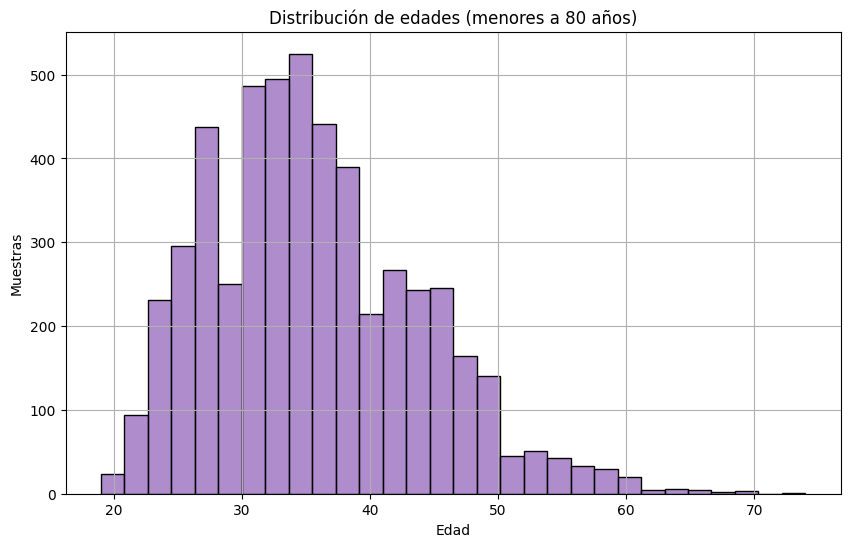

In [7]:
### Gráfico de distribución de la variable edad
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df.tengo_edad < 80], x='tengo_edad', bins=30, color='#9467bd')

plt.title('Distribución de edades (menores a 80 años)')
plt.xlabel('Edad')
plt.ylabel('Muestras') #Cambiar por Muestras, cantidad
plt.grid(True)
plt.show()

La mayoría de las personas encuestadas tienen entre $25$ y $45$ **años**, con un pico de frecuencia alrededor de los $33$ **años**. A partir de los $50$ **años**, la participación disminuye notablemente, mostrando que el sector IT relevado está compuesto en su mayoría por personas jóvenes y en etapa laboral activa.

### **Detección de valores atípicos en la edad.**

In [8]:
# Convertimos la columna 'tengo_edad' a numérica, forzando errores como NaN
df['tengo_edad'] = pd.to_numeric(df['tengo_edad'], errors='coerce')

# Filtra y muestra solo las edades mayores a 80
edades_mayores_80 = df[df['tengo_edad'] > 80]['tengo_edad']
print(edades_mayores_80)


883      100
2008     227
3350    3040
3582      99
3654     354
3783    1000
4223     500
4927      90
Name: tengo_edad, dtype: int64


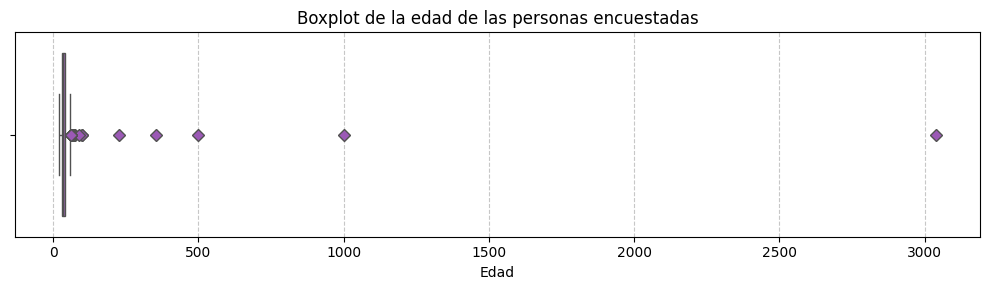

In [9]:
#Boxplot de la variable "edad"
plt.figure(figsize=(10, 3))
sns.boxplot(data=df, x='tengo_edad', color= '#9b59b6', flierprops=dict(marker='D', markerfacecolor= '#9b59b6', markersize=6))
plt.title("Boxplot de la edad de las personas encuestadas")
plt.xlabel("Edad")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Al trabajar con datos reales, es común encontrar errores de carga. En este caso, detectamos valores en la columna edad como `100`, `227`, `354`, `500`, `1000` y `3040`, los cuales son claramente incorrectos.
Estos outliers pueden afectar negativamente el análisis y la interpretación de los resultados, por lo que es fundamental filtrarlos para asegurar una exploración estadística confiable y representativa del mercado laboral real.

### **b. Distribución de género**

In [10]:
# Casos de genero en la encuesta
genero_counts = df['genero'].value_counts()
genero_counts

,count
genero,
Hombre Cis,4083
Mujer Cis,1027
Prefiero no decir,44
No binarie,26
Queer,8
Trans,4
Lesbiana,1
Agénero,1


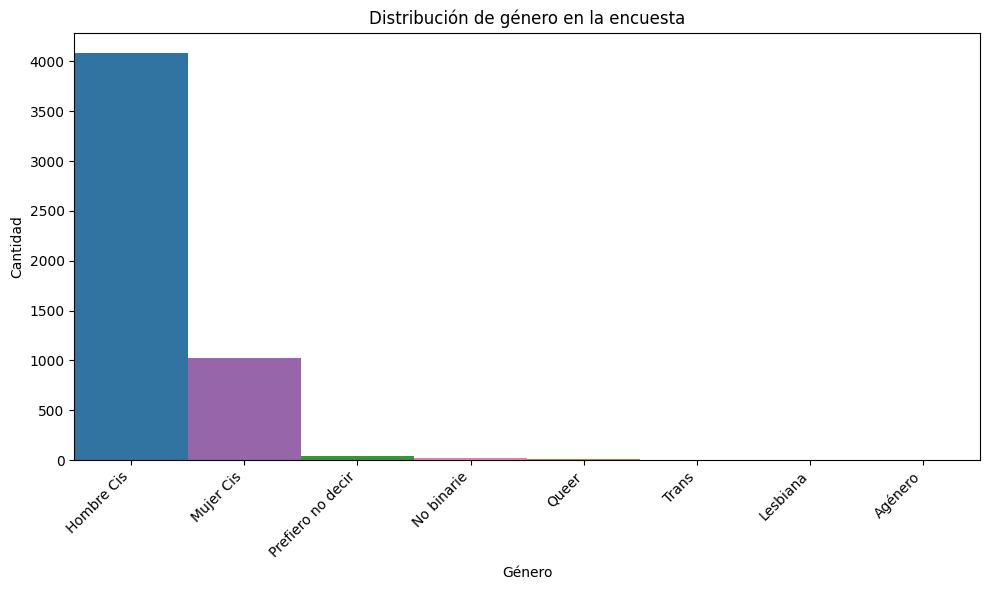

In [11]:
#Gráfico para ver la relación entre los géneros
df_genero = genero_counts.reset_index()
df_genero.columns = ['Genero', 'Cantidad']
colores = ['#1f77b4', '#9b59b6', '#2ca02c', '#ff69b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(10,6))
sns.barplot(data=df_genero, x='Genero', y='Cantidad', hue='Genero', palette=colores,width=1, legend=False)
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.title("Distribución de género en la encuesta")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 La muestra presenta una marcada desigualdad de `genero`: el `68%` de las personas encuestadas se identifican como **Hombres** ($4083$ de $5968$), seguidos por **Mujeres** ($1027$), mientras que el resto de las identidades tienen una representación mucho menor. Esta distribución, común en el sector IT, genera un **sesgo importante** que debe tenerse en cuenta, ya que puede influir en otras variables del análisis, como la brecha salarial o el acceso a oportunidades laborales.

### **c. Análisis del salario mensual bruto**

Una de las variables centrales en este análisis es el **salario mensual bruto**, disponible en la columna `ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos`. Esta variable permite explorar la distribución de los ingresos, identificar brechas y comparar valores entre distintos grupos, como género, antigüedad o nivel de conformidad.

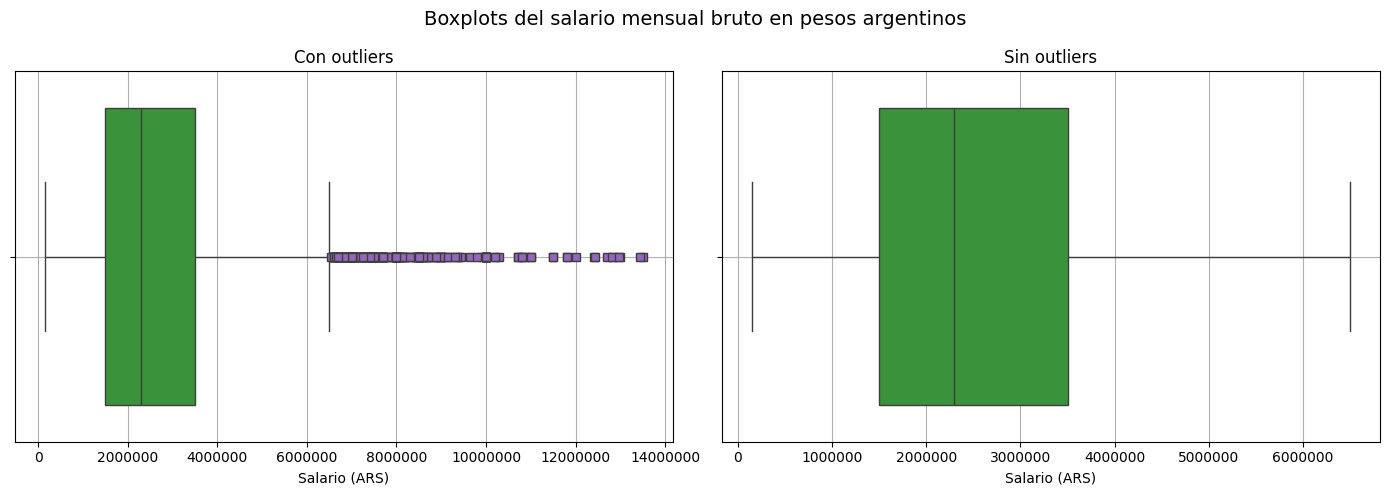

In [12]:
# Boxplots del salario mensual bruto: con y sin outliers
plt.figure(figsize=(14, 5))
# Subplot 1: Con outliers
plt.subplot(1, 2, 1)
sns.boxplot(
    x=df["ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos"],
    color='#2ca02c',
    flierprops=dict(marker='s', markerfacecolor='#9467bd', markersize=6)
)
plt.title("Con outliers")
plt.xlabel("Salario (ARS)")
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True)

# Subplot 2: Sin outliers
plt.subplot(1, 2, 2)
sns.boxplot(
    x=df["ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos"],
    color='#2ca02c',
    showfliers=False
)
plt.title("Sin outliers")
plt.xlabel("Salario (ARS)")
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True)

plt.suptitle("Boxplots del salario mensual bruto en pesos argentinos", fontsize=14)
plt.tight_layout()
plt.show()

Los dos boxplots del **salario mensual bruto** en pesos argentinos. El primero incluye **outliers** que distorsionan la escala, mientras que el segundo los excluye para mostrar mejor la distribución central, asimétrica a la derecha, con concentración entre `$1500000` y `$3500000` pesos. La **mediana** es una medida más adecuada que la **media**, al no verse afectada por los valores extremos.

> El siguiente gráfico se muestra la distribución completa de los **salarios mensuales brutos**. Se destacan la **media** y la **mediana** para comparar su diferencia en una distribución posiblemente asimétrica.


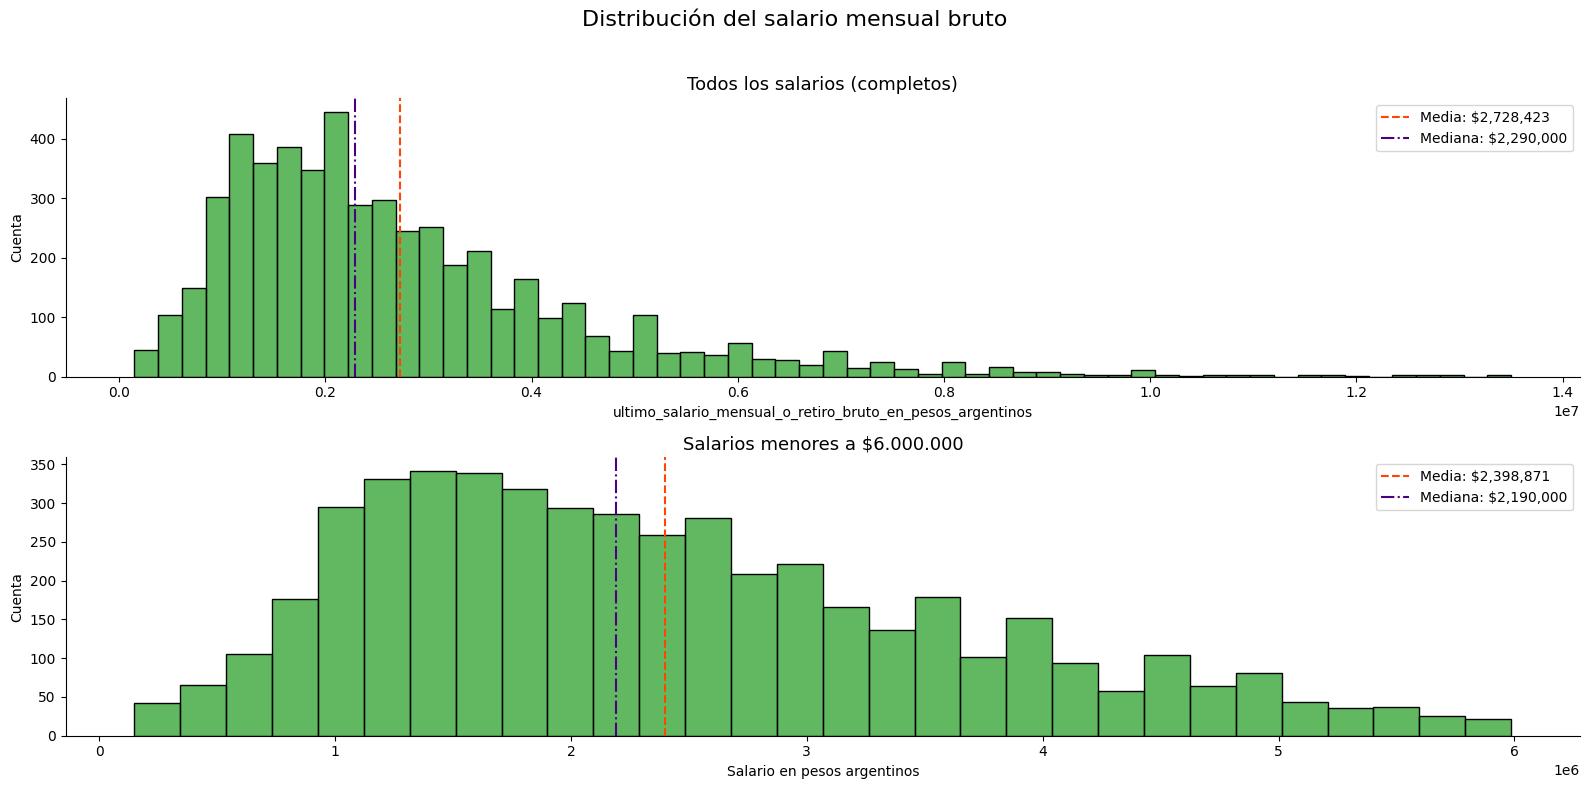

Media (todos): $2,728,423
Mediana (todos): $2,290,000
Media (filtrados < $6.000.000): $2,398,871
Mediana (filtrados < $6.000.000): $2,190,000


In [13]:
def plot_histograma(ax, datos, titulo):
    media = datos.mean()
    mediana = datos.median()

    sns.histplot(datos, ax=ax, color='#2ca02c', edgecolor='black') #bins=50
    ax.axvline(media, color='orangered', linestyle='--', label=f'Media: ${media:,.0f}')
    ax.axvline(mediana, color='indigo', linestyle='-.', label=f'Mediana: ${mediana:,.0f}')
    ax.set_title(titulo, fontsize=13)
    ax.set_ylabel("Cuenta")
    ax.legend()
    return media, mediana

#Analizar menor a 6M, no a 600k

columna = 'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'
datos_completos = df[columna]
datos_filtrados = df[df[columna] < 6000000][columna]
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
fig.suptitle("Distribución del salario mensual bruto", fontsize=16)

# Ambos histogramas
media_total, mediana_total = plot_histograma(axes[0], datos_completos, "Todos los salarios (completos)")
media_filtrada, mediana_filtrada = plot_histograma(axes[1], datos_filtrados, "Salarios menores a $6.000.000")
axes[1].set_xlabel("Salario en pesos argentinos")

sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print(f"Media (todos): ${media_total:,.0f}")
print(f"Mediana (todos): ${mediana_total:,.0f}")
print(f"Media (filtrados < $6.000.000): ${media_filtrada:,.0f}")
print(f"Mediana (filtrados < $6.000.000): ${mediana_filtrada:,.0f}")

El gráfico compara la distribución del salario mensual bruto en dos escenarios: todos los salarios y salarios menores a `$6,000,000 ARS`. Se observa que el conjunto de **salarios completos está fuertemente sesgado hacia la derecha**, con una cola larga de ingresos muy altos, lo que provoca que la media `($2,728,423 ARS)` sea considerablemente mayor que la mediana `($2,290,000 ARS)`.

Al **filtrar los salarios menores a `$6,000,000 ARS`**, la distribución se vuelve más concentrada y menos sesgada, aunque sigue existiendo una diferencia entre la media `($2,398,871 ARS)` y la mediana `($2,190,000 ARS)`. Esto indica que, incluso eliminando los salarios extremos, la distribución sigue teniendo una tendencia hacia ingresos más altos, pero la mayoría de los encuestados se agrupan en torno a la mediana filtrada, que es más representativa del salario típico sin la influencia de los valores atípicos más extremos.

### **d. Cantidad de personas por año de experiencia.**

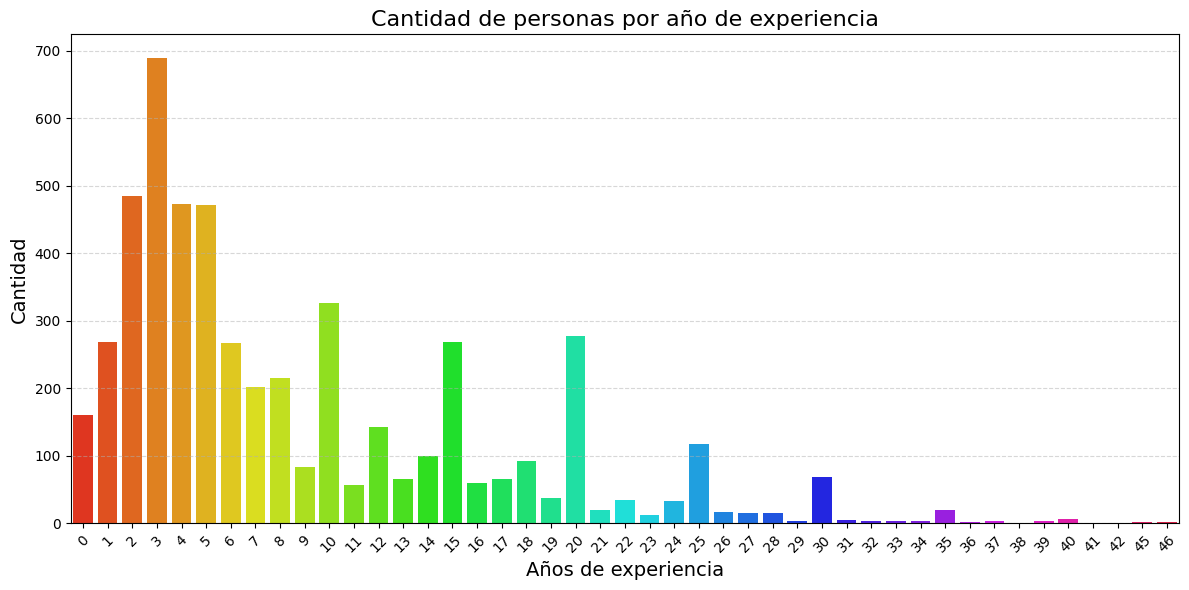

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='anos_de_experiencia', data=df_red, palette='hsv')
plt.title('Cantidad de personas por año de experiencia', fontsize=16)
plt.xlabel('Años de experiencia', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Este gráfico muestra la cantidad de personas según sus años de experiencia laboral. La mayor concentración se encuentra entre los $0$ y $5$ **años de experiencia**, destacándose especialmente quienes tienen $3$ **años**, con casi $700$ **personas**. A medida que aumentan los años de experiencia, la cantidad de personas disminuye de forma notable, siendo muy baja a partir de los $30$ **años**. Esto sugiere que el mercado laboral analizado está compuesto en su mayoría por personas relativamente jóvenes o con poca trayectoria en el sector.

### **Años de experiencia, con promedio por genero y edad**

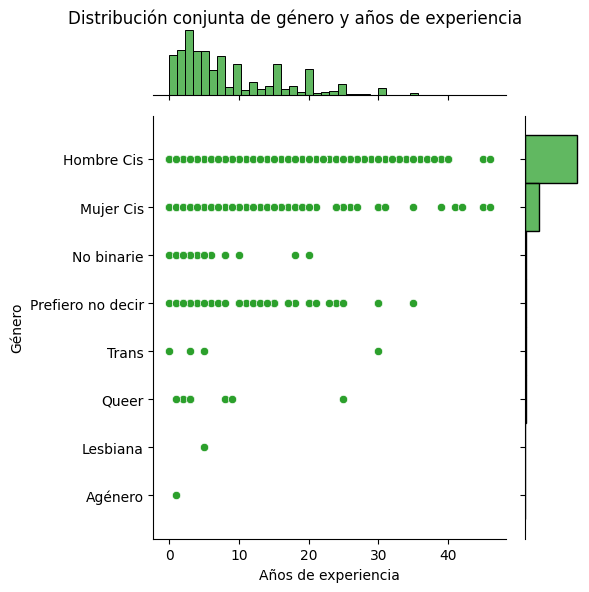

In [15]:
g = sns.jointplot(
    data=df_red,
    x='anos_de_experiencia',
    y='genero',
    kind='scatter',
    color='#2ca02c',
    height=6
)

g.set_axis_labels("Años de experiencia", "Género", fontsize=10)
g.fig.suptitle("Distribución conjunta de género y años de experiencia", fontsize=12)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)


Este `jointplot` muestra cómo se distribuyen los años de experiencia según el género. Las categorías **Hombre** y **Mujer** tienen mayor presencia, con concentración en rangos bajos y medios de experiencia. Otras identidades también presentan variedad, aunque con menos datos. Para conocer promedios exactos por género se necesita un análisis numérico adicional. Esta visualización permite observar **la diversidad y dispersión de experiencia según identidad de género**.


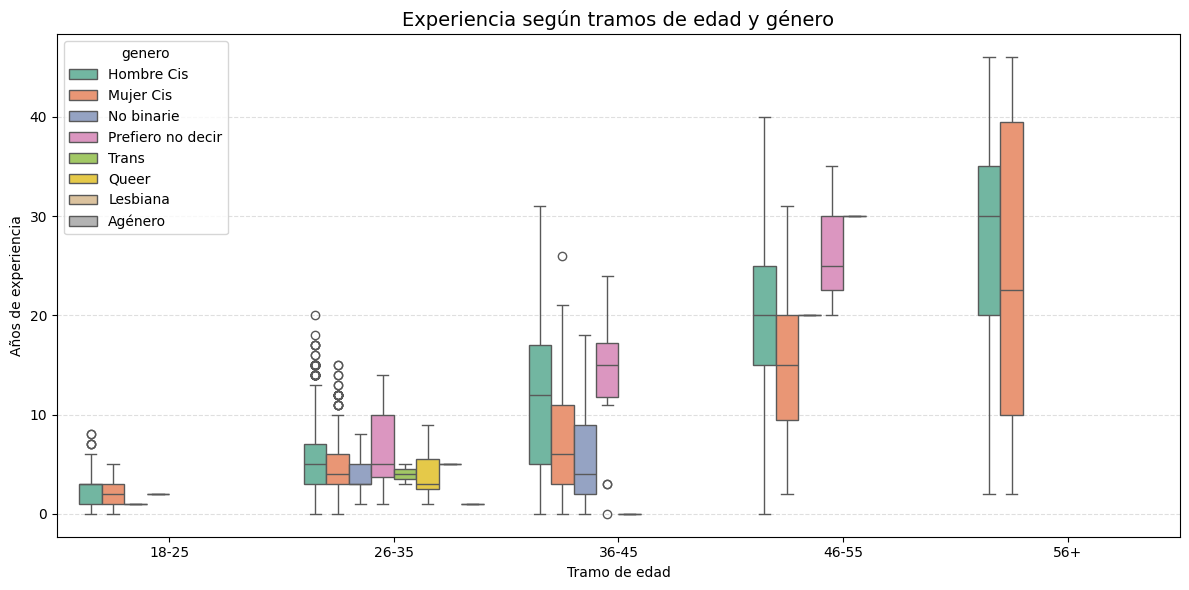

In [16]:
# Agrupar edad por tramos
df_red['tramo_edad'] = pd.cut(df_red['tengo_edad'], bins=[18, 25, 35, 45, 55, 70],
                               labels=['18-25', '26-35', '36-45', '46-55', '56+'])
plt.figure(figsize=(12,6))
sns.boxplot(data=df_red, x='tramo_edad', y='anos_de_experiencia', hue='genero', palette='Set2')
plt.title("Experiencia según tramos de edad y género", fontsize=14)
plt.xlabel("Tramo de edad")
plt.ylabel("Años de experiencia")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


El boxplot muestra cómo se distribuyen los años de experiencia según tramos de edad y género. Se observa que la **experiencia tiende a aumentar con la edad**, con medianas más altas a partir del tramo 36-45, especialmente en "Hombre Cis" y "Mujer Cis".  
En los tramos más jóvenes (18-25 y 26-35), la experiencia es menor, aunque aparecen algunos outliers.  
Para géneros menos representados, los resultados pueden ser menos robustos, pero igual aportan información sobre sus trayectorias laborales.


### **e. Distribución de Encuentados por Nivel Educativo Alcanzado**

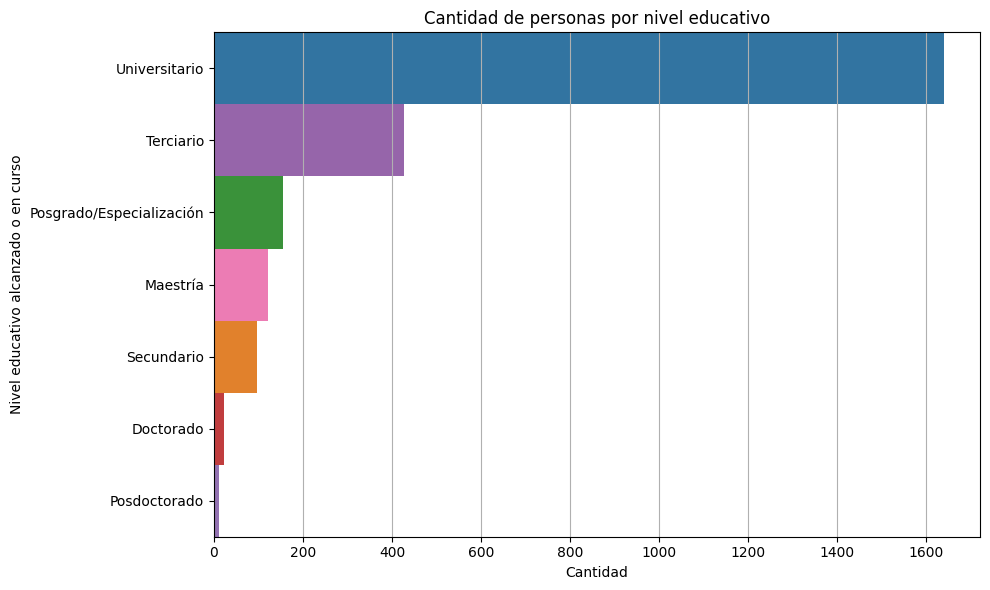

In [17]:
# Conteo de personas por nivel educativo
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_red,
    y='maximo_nivel_de_estudios',
    order=df_red['maximo_nivel_de_estudios'].value_counts().index,
    palette=['#1f77b4', '#9b59b6', '#2ca02c', '#ff69b4', '#ff7f0e', '#d62728', '#9467bd'],
    width=1
)

plt.title("Cantidad de personas por nivel educativo")
plt.xlabel("Cantidad")
plt.ylabel("Nivel educativo alcanzado o en curso")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

En este gráfico se revela claramente que la **mayor parte de los encuestados ha alcanzado o está cursando estudios universitarios**, siendo el nivel predominante. Le siguen, en menor medida, aquellos con formación **terciaria**, mientras que los niveles de **posgrado** (Posgrado/Especialización, Maestría, Doctorado y Posdoctorado) y **secundario** representan una proporción menor de la muestra.

### **f. Cantidad de personas según nivel de conformidad con sus ingresos.**

Media: 2.55
Mediana: 3.00


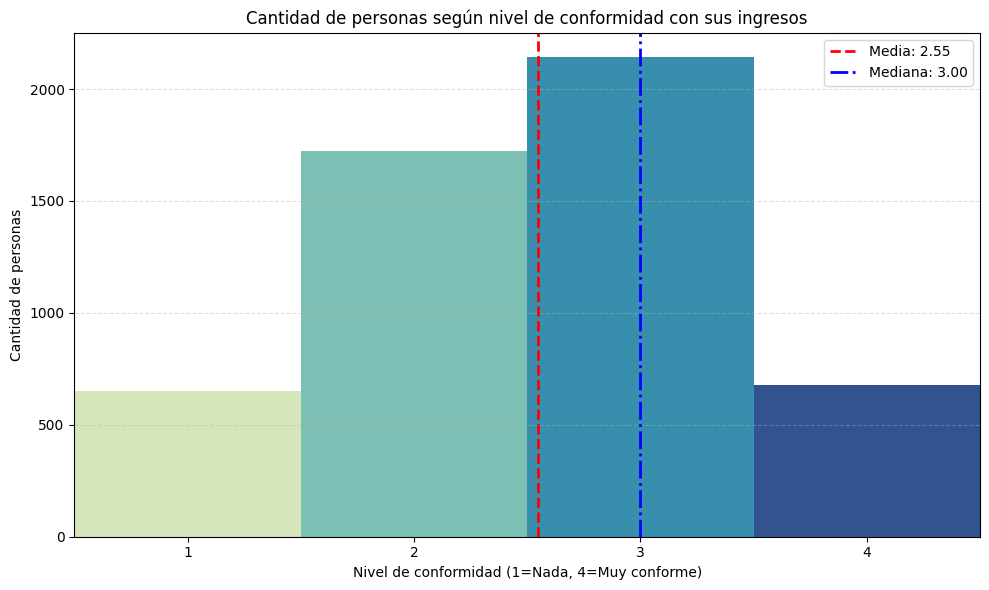

In [18]:
# Convertir conformidad a numérico si no lo hiciste antes
df_red['conformidad_num'] = pd.to_numeric(
    df_red['que_tan_conforme_estas_con_tus_ingresos_laborales'], errors='coerce'
)

media_conformidad = df_red['conformidad_num'].mean()
mediana_conformidad = df_red['conformidad_num'].median()

print(f"Media: {media_conformidad:.2f}")
print(f"Mediana: {mediana_conformidad:.2f}")
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_red,
    x='que_tan_conforme_estas_con_tus_ingresos_laborales',
    order=["1", "2", "3", "4"],
    palette='YlGnBu',
    width=1
)
plt.axvline(x=media_conformidad - 1, color='red', linestyle='--', linewidth=2, label=f'Media: {media_conformidad:.2f}')
plt.axvline(x=mediana_conformidad - 1, color='blue', linestyle='-.', linewidth=2, label=f'Mediana: {mediana_conformidad:.2f}')

plt.title('Cantidad de personas según nivel de conformidad con sus ingresos')
plt.xlabel('Nivel de conformidad (1=Nada, 4=Muy conforme)')
plt.ylabel('Cantidad de personas')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


Como muestra el gráfico, la mayoría de las personas encuestadas se ubica en un **nivel intermedio de conformidad con sus ingresos**. El nivel **3 ("Conforme")** es el más frecuente, seguido por el **nivel 2**, lo que sugiere una **tendencia general hacia la conformidad moderada** con la situación salarial.

Este patrón se refuerza al observar los valores estadísticos:

- La **mediana** de conformidad es **3.00**, lo que indica que al menos la mitad de los encuestados se considera conforme o muy conforme.
- La **media** es **2.55**, levemente inferior, lo que revela que hay una proporción significativa de personas que se sienten algo menos satisfechas.

En conjunto, estos datos reflejan que, si bien hay cierto grado de insatisfacción, no es predominante, y los extremos ("Nada conforme" y "Muy conforme") son menos frecuentes.


## **1.2: Exploración del salario bruto**
### **Análisis de la Distribución Salarial (Dataset Reducido)**

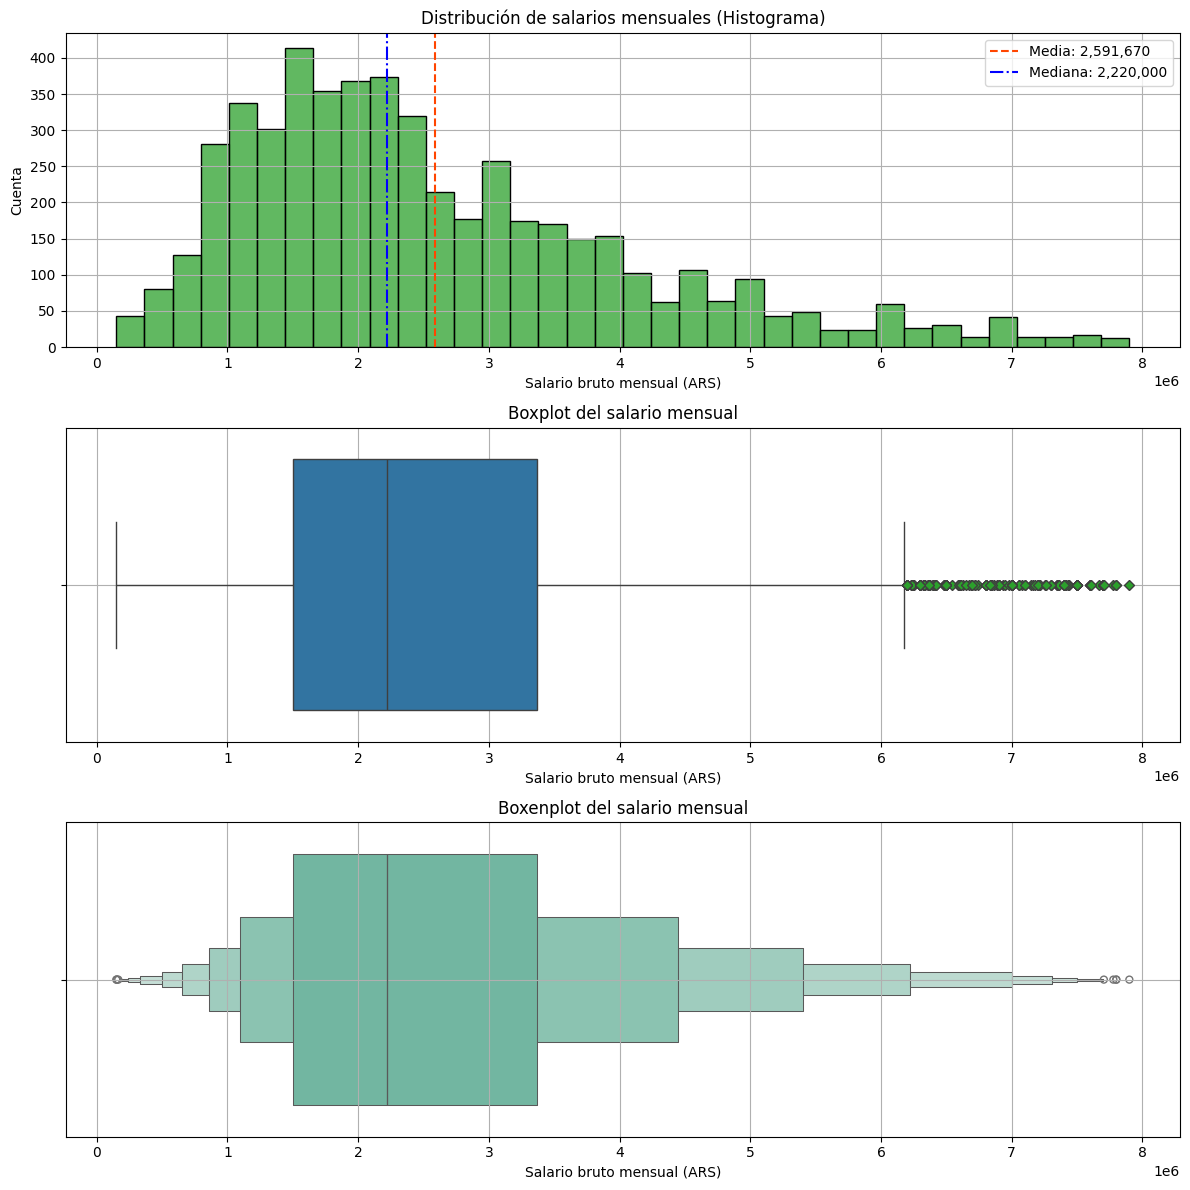

In [19]:
# Visualización combinada: Histograma, Boxplot y Boxenplot del salario mensual (sin outliers extremos)
max_limite = df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'].quantile(0.98)
data = df[df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'] < max_limite]['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos']
media = data.mean()
mediana = data.median()
fig, axes = plt.subplots(nrows=3, figsize=(12, 12))
# Histograma
sns.histplot(x=data, ax=axes[0], color="#2ca02c")
axes[0].axvline(media, color='orangered', linestyle='--', label=f'Media: {int(media):,}')
axes[0].axvline(mediana, color='blue', linestyle='-.', label=f'Mediana: {int(mediana):,}')
axes[0].set_title("Distribución de salarios mensuales (Histograma)")
axes[0].set_xlabel("Salario bruto mensual (ARS)")
axes[0].set_ylabel("Cuenta")
axes[0].legend()
axes[0].grid(True)
# Boxplot
sns.boxplot(x=data, ax=axes[1], flierprops=dict(marker='D', markerfacecolor='#2ca02c', markersize=5))
axes[1].set_title("Boxplot del salario mensual")
axes[1].set_xlabel("Salario bruto mensual (ARS)")
axes[1].grid(True)
# Boxenplot
sns.boxenplot(x=data, ax=axes[2], palette="Set2")
axes[2].set_title("Boxenplot del salario mensual")
axes[2].set_xlabel("Salario bruto mensual (ARS)")
axes[2].grid(True)

plt.tight_layout()
plt.show()

Se trabajó con un **dataset depurado de 5968 registros**, que incluye al 98% de los encuestados con salarios más bajos, excluyendo atípicos (**2% con sueldos más altos** y mayores a 100 años).
El histograma muestra una clara **concentración de salarios entre $1.000.000 y $3.000.000**, con **asimetría a la derecha**. La **media supera a la mediana**, indicando que salarios elevados aún elevan el promedio, lo que es típico en distribuciones desiguales.
Tanto **el boxplot como el boxenplot** confirmen esta tendencia: la mayoría se ubica en rangos medios, pero un grupo reducido percibe **ingresos significativamente más altos**.
Esta distribución resalta una **marcada desigualdad salarial**, con implicaciones importantes para el diseño de políticas públicas que busquen reducir brechas económicas y fomentar escalas salariales más equitativas.



 ##  **2. Cruces y comparaciones**
### **a. ¿Hay brechas salariales por géneros?**
### **Distribución del salario mensual bruto por género.**

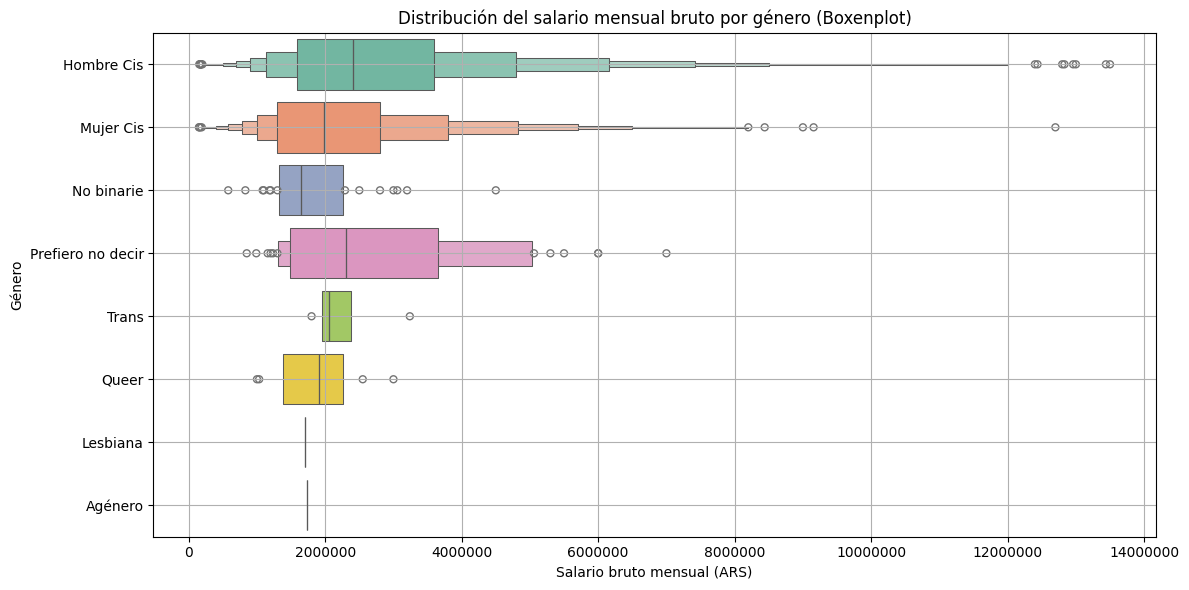

In [20]:
 # Boxenplot del salario mensual bruto por género (datos filtrados)
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df_red, x='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos', y='genero', palette='Set2')
plt.title("Distribución del salario mensual bruto por género (Boxenplot)")
plt.xlabel("Salario bruto mensual (ARS)")
plt.ylabel("Género")
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True)
plt.tight_layout()
plt.show()

Este **boxenplot** revela **marcadas diferencias en la distribución del salario bruto mensual entre las distintas identidades de género.** Se observa que los **Hombres** presentan la mediana salarial más alta y una de las mayores dispersiones. En contraste, los salarios de las **Mujeres** y, en general, los de otras identidades de género como **No binario, Trans, Queer, Lesbiana y Agénero**, tienden a situarse en rangos de ingresos inferiores. Esto sugiere una **brecha salarial significativa** entre las diferentes categorías de género dentro de la muestra.

### **Distribución de Nivel de Estudios por Género**

In [21]:
#Tabla de contigencia para ver el nivel de estudios según género
pd.crosstab(df_red.genero, df_red.maximo_nivel_de_estudios)

maximo_nivel_de_estudios,Doctorado,Maestría,Posdoctorado,Posgrado/Especialización,Secundario,Terciario,Universitario
genero,,,,,,,
Agénero,0,0,0,0,0,0,1
Hombre Cis,19,88,8,99,85,336,1243
Lesbiana,0,0,0,0,0,0,1
Mujer Cis,3,34,3,55,8,83,366
No binarie,0,0,0,0,0,5,10
Prefiero no decir,0,0,1,1,1,2,14
Queer,0,0,0,0,2,1,3
Trans,0,0,0,0,0,1,1


Una **tabla de contigencia** permite visualizar la cantidad de caos desagregados por **nivel educativo** y **género**.
Para completar este análisis, una **mapa de calor** resulta útil para identificar de forma visual las **concentraciones más altas o bajas** de registros en cada combinación de variables.

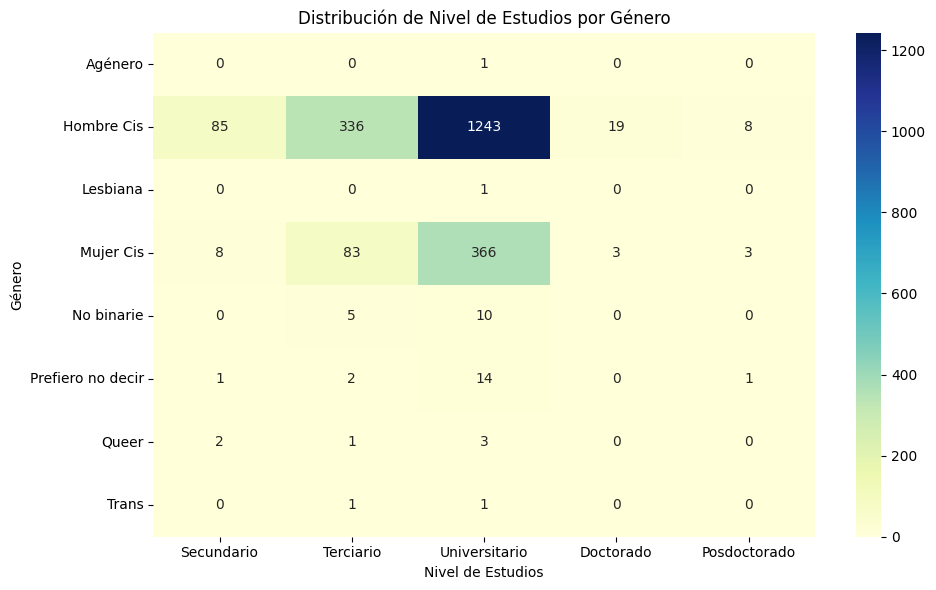

In [22]:
# Distribución de Nivel de Estudios por Género
# Mapa de calor de la tabla anterior
sorted_studies_levels = ['Secundario', 'Terciario', 'Universitario', 'Doctorado', 'Posdoctorado']
fig = plt.figure(figsize=(10,6))
exp = pd.crosstab(df_red.genero, df_red.maximo_nivel_de_estudios)[sorted_studies_levels]
sns.heatmap(exp, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Distribución de Nivel de Estudios por Género')
plt.xlabel('Nivel de Estudios')
plt.ylabel('Género')
plt.tight_layout()
plt.show()

Este **mapa de calor visualiza una tabla de contingencia**, permitiéndonos identificar rápidamente las **concentraciones de personas por su nivel educativo y género**. Se observa una **clara predominancia de hombres y mujeres Cisgénero con estudios universitarios**, siendo este el grupo más numeroso en la muestra. Además, se aprecian menores cantidades de personas en los niveles educativos más avanzados (Doctorado, Posdoctorado) y en las categorías de género con menor representación, lo que subraya las principales composiciones de nuestra población encuestada.

### **b. ¿Cómo varía el sueldo según el nivel de seniority?**



In [23]:
# Se agrupa por seniority y calcular estadísticas descriptivas del salario
estadisticas_seniority = df_red.groupby('seniority')['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max',
    std='std'
).reset_index()
print("Estadísticas del salario mensual bruto por nivel de seniority:")
print(estadisticas_seniority)

Estadísticas del salario mensual bruto por nivel de seniority:
     seniority  count          mean     median       min         max  \
0       Junior    914  1.473769e+06  1300000.0  154700.0   7200000.0   
1  Semi-Senior   1634  2.271946e+06  2000000.0  150000.0  13500000.0   
2       Senior   2648  3.443164e+06  3000000.0  154753.0  13440000.0   

            std  
0  8.667331e+05  
1  1.250229e+06  
2  1.952780e+06  


Confirmamos que **a mayor seniority, mayor es el salario mensual bruto y su variabilidad**.

* **Salarios:** La mediana sube de `$1.300.000` (Junior) a `$3.000.000` (Senior).
* **Dispersión:** La variabilidad salarial aumenta con el nivel, siendo mayor en roles Senior.
* **Outliers:** La media es superior a la mediana en todos los niveles, indicando presencia de salarios muy altos que elevan el promedio.

**En síntesis:** El seniority impacta tanto en el nivel como en la desigualdad de los salarios.

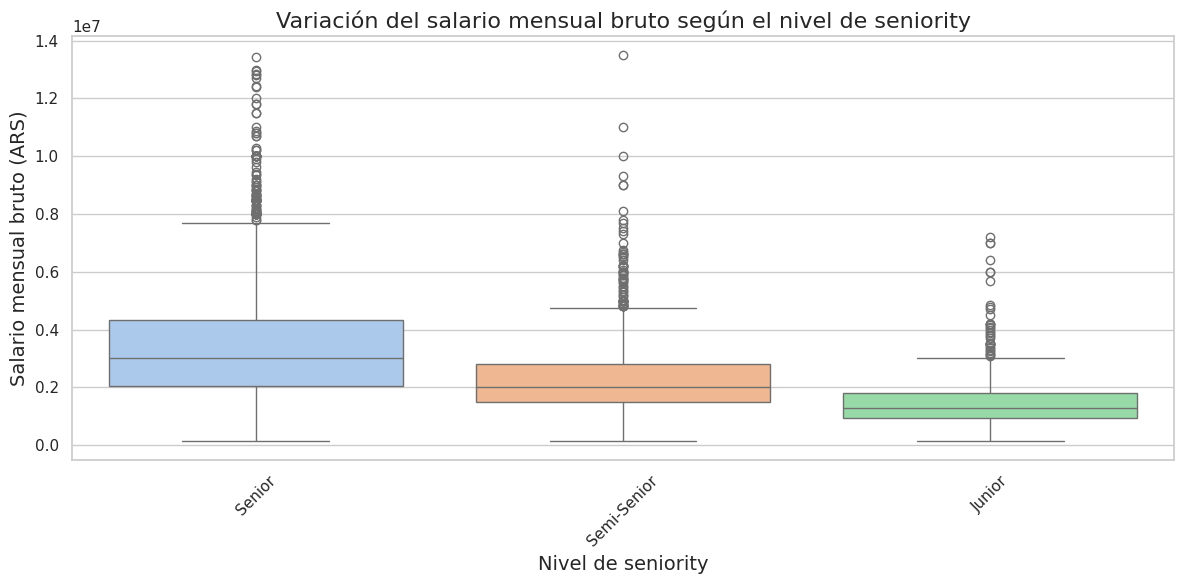

In [25]:
# Boxplot del salario por nivel de seniority
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.boxplot(
    data=df_red,
    x='seniority',
    y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
    palette='pastel'
)

# Títulos y etiquetas
plt.title('Variación del salario mensual bruto según el nivel de seniority', fontsize=16)
plt.xlabel('Nivel de seniority', fontsize=14)
plt.ylabel('Salario mensual bruto (ARS)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


En el gráfico se evidencia una relación positiva entre el `nivel de seniority` y el `salario mensual bruto`. A mayor experiencia, aumentan tanto la mediana salarial como la dispersión de los ingresos.
* **Junior:** Mediana más baja y distribución compacta.

* **Semi-Senior:** Ingreso intermedio con mayor variabilidad.

* **Senior:** Salarios más altos, gran dispersión y presencia de valores atípicos con ingresos elevados.

Llegamos a la conclusión de que el **seniority influye directamente en los ingresos**. Los roles Senior acceden no solo a mejores salarios, sino también a un rango más amplio de posibilidades económicas.

### **c. ¿Influye el tipo de lenguaje de programación en el salario?**

### **Salarios promedio por lenguaje**

In [26]:
Crear un nuevo DataFrame desglosando los lenguajes (puede haber varios por persona)
df_lenguajes = df_red.dropna(subset=['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'])

# Separar los lenguajes en filas individuales
df_lenguajes = df_lenguajes.assign(
    lenguaje_individual=df_lenguajes['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'].str.split(',')
).explode('lenguaje_individual')

# Limpiar espacios en blanco
df_lenguajes['lenguaje_individual'] = df_lenguajes['lenguaje_individual'].str.strip()


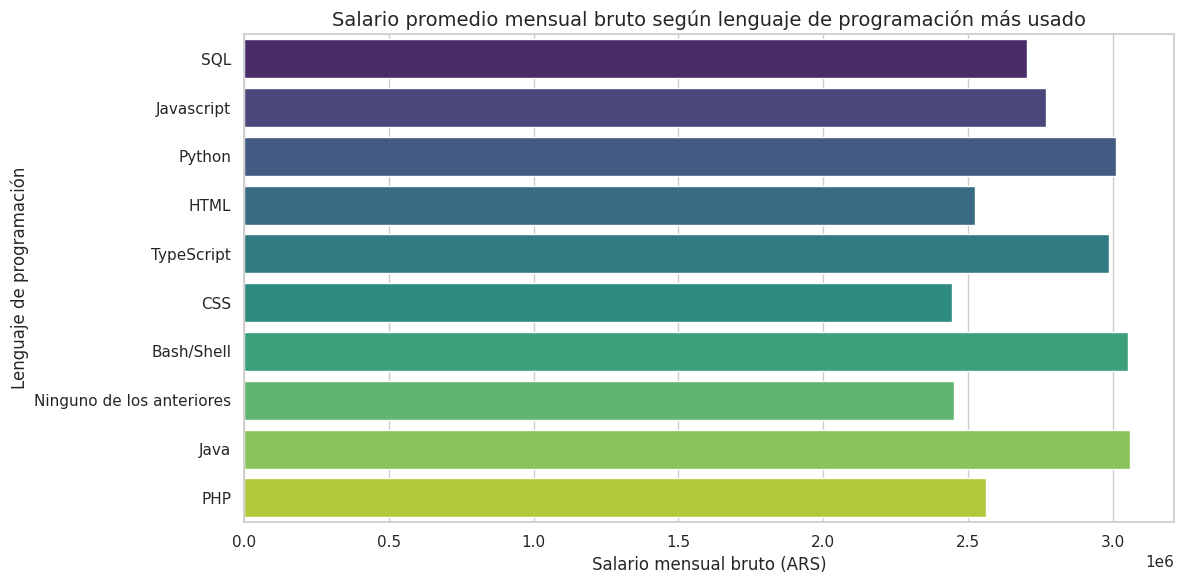

In [27]:
# Calcular salario promedio por lenguaje
salario_promedio_por_lenguaje = df_lenguajes.groupby('lenguaje_individual')['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'].mean().sort_values(ascending=False)

# Filtrar lenguajes más frecuentes (opcionales: top 10)
lenguajes_frecuentes = df_lenguajes['lenguaje_individual'].value_counts().head(10).index
salario_promedio_filtrado = salario_promedio_por_lenguaje.loc[lenguajes_frecuentes]

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    x=salario_promedio_filtrado.values,
    y=salario_promedio_filtrado.index,
    palette="viridis"
)
plt.title('Salario promedio mensual bruto según lenguaje de programación más usado', fontsize=14)
plt.xlabel('Salario mensual bruto (ARS)')
plt.ylabel('Lenguaje de programación')
plt.tight_layout()
plt.show()


El gráfico de barras muestra que, entre los 10 lenguajes más usados, **existen diferencias salariales**, aunque los promedios tienden a estar en un rango similar.

**Hallazgos clave:**

* **Bash/Shell, Java, Python y TypeScript** lideran con los salarios promedio más altos.
* La mayoría de los lenguajes se ubican entre **2,5 y 3 millones de ARS** mensuales.
* Las diferencias existen, pero **los lenguajes populares tienden a ofrecer ingresos comparables**.

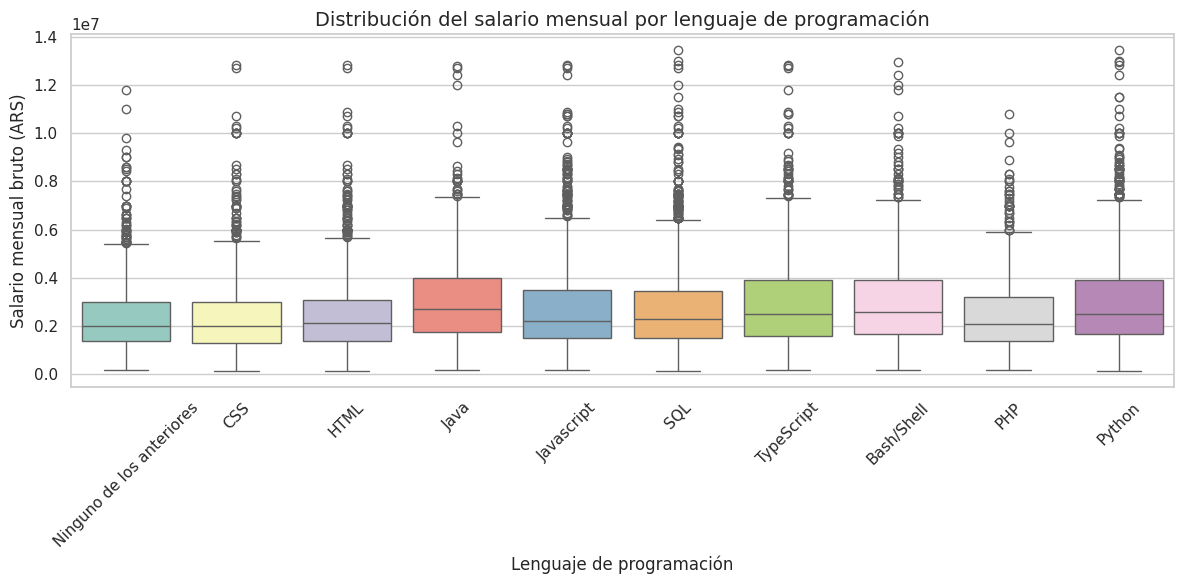

In [28]:
# Filtrar lenguajes más frecuentes para el boxplot
df_boxplot = df_lenguajes[df_lenguajes['lenguaje_individual'].isin(lenguajes_frecuentes)]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_boxplot,
    x='lenguaje_individual',
    y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
    palette="Set3"
)
plt.title('Distribución del salario mensual por lenguaje de programación', fontsize=14)
plt.xlabel('Lenguaje de programación')
plt.ylabel('Salario mensual bruto (ARS)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El Boxplot muestra que, entre los lenguajes más utilizados, **las distribuciones salariales son bastante similares**.

**Hallazgos clave:**

* Las **medianas salariales** están agrupadas, lo que indica que el salario típico no varía mucho entre lenguajes.
* La **dispersión (rango intercuartílico)** es comparable en la mayoría de los casos.
* Hay **outliers en todos los lenguajes**, lo que sugiere la existencia de sueldos muy altos que elevan el promedio, aunque no afecten tanto al salario mediano.

A pesar de diferencias en los promedios, la distribución salarial central es similar entre lenguajes populares.

### **d. ¿Existen diferencias salariales entre quienes viven en CABA y el resto del país?**

region
CABA        2643
Interior    2553
Name: count, dtype: int64


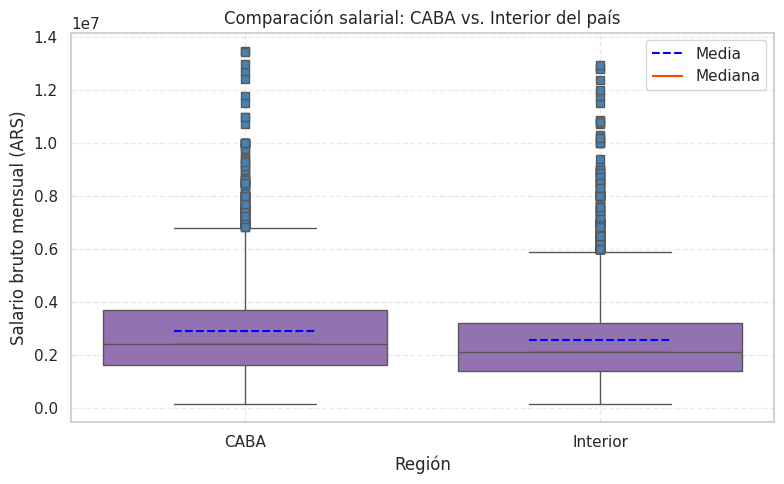

In [29]:

df_region = df_red.dropna(subset=['donde_estas_trabajando', 'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos']).copy()

def clasificar_region(lugar):
    lugar = str(lugar).upper()
    claves_caba = ['CABA', 'CIUDAD AUTÓNOMA', 'CIUDAD AUTONOMA', 'CAPITAL FEDERAL', 'BUENOS AIRES, CIUDAD']
    if any(clave in lugar for clave in claves_caba):
        return 'CABA'
    else:
        return 'Interior'

df_region['region'] = df_region['donde_estas_trabajando'].apply(clasificar_region)

# Confirmar resultados
print(df_region['region'].value_counts())

# Calcular estadísticas por región
estadisticas = (
    df_region
    .groupby('region')['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos']
    .agg(['mean', 'median'])
    .reset_index()
)

# Boxplot con medias y medianas
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_region,
    x='region',
    y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
    color='#9467bd',
    flierprops=dict(marker='s', markerfacecolor='steelblue', markersize=6)
)

# Agregar líneas de media y mediana
for i, region in enumerate(estadisticas['region']):
    media = estadisticas.loc[estadisticas['region'] == region, 'mean'].values[0]
    mediana = estadisticas.loc[estadisticas['region'] == region, 'median'].values[0]

    plt.hlines(y=media, xmin=i - 0.2, xmax=i + 0.2, colors='blue', linestyles='--', label='Media' if i == 0 else "")
    plt.hlines(y=mediana, xmin=i - 0.2, xmax=i + 0.2, color='orangered', linestyles='-', label='Mediana' if i == 0 else "")

# Estilo del gráfico
plt.title('Comparación salarial: CABA vs. Interior del país')
plt.xlabel('Región')
plt.ylabel('Salario bruto mensual (ARS)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


El gráfico compara la **distribución del salario mensual bruto entre CABA y el Interior del país**. Se observa una **clara ventaja salarial para quienes trabajan en CABA**.

Las medianas y medias salariales en **CABA son consistentemente más altas** que las del Interior, lo que indica que, en promedio, se perciben mejores ingresos en la capital. Además, CABA muestra una **mayor dispersión de salarios y un mayor número de *outliers* de ingresos elevados**, sugiriendo un potencial de ganancias considerablemente mayor en comparación con el Interior. Esto resalta una **brecha salarial regional** significativa.

In [30]:
def clasificar_provincia(lugar):
    lugar = str(lugar).upper()

    if any(kw in lugar for kw in ['CABA', 'CIUDAD AUTÓNOMA', 'CIUDAD AUTONOMA', 'CAPITAL FEDERAL']):
        return 'CABA'
    elif 'BUENOS AIRES' in lugar and 'CIUDAD' not in lugar and 'CABA' not in lugar:
        return 'Buenos Aires (Provincia)'
    elif 'CORDOBA' in lugar:
        return 'Córdoba'
    elif 'SANTA FE' in lugar:
        return 'Santa Fe'
    elif 'MENDOZA' in lugar:
        return 'Mendoza'
    elif 'TUCUMAN' in lugar:
        return 'Tucumán'
    elif 'ENTRE RIOS' in lugar:
        return 'Entre Ríos'
    elif 'NEUQUEN' in lugar:
        return 'Neuquén'
    elif 'CHUBUT' in lugar:
        return 'Chubut'
    elif 'SALTA' in lugar:
        return 'Salta'
    elif 'RIO NEGRO' in lugar:
        return 'Río Negro'
    elif 'SAN LUIS' in lugar:
        return 'San Luis'
    elif 'SAN JUAN' in lugar:
        return 'San Juan'
    elif 'MISIONES' in lugar:
        return 'Misiones'
    elif 'JUJUY' in lugar:
        return 'Jujuy'
    elif 'LA PAMPA' in lugar:
        return 'La Pampa'
    elif 'FORMOSA' in lugar:
        return 'Formosa'
    elif 'CHACO' in lugar:
        return 'Chaco'
    elif 'CATAMARCA' in lugar:
        return 'Catamarca'
    elif 'CORRIENTES' in lugar:
        return 'Corrientes'
    elif 'SANTIAGO DEL ESTERO' in lugar:
        return 'Santiago del Estero'
    elif 'LA RIOJA' in lugar:
        return 'La Rioja'
    elif 'TIERRA DEL FUEGO' in lugar:
        return 'Tierra del Fuego'
    elif 'SANTA CRUZ' in lugar:
        return 'Santa Cruz'
    else:
        return 'Otros'


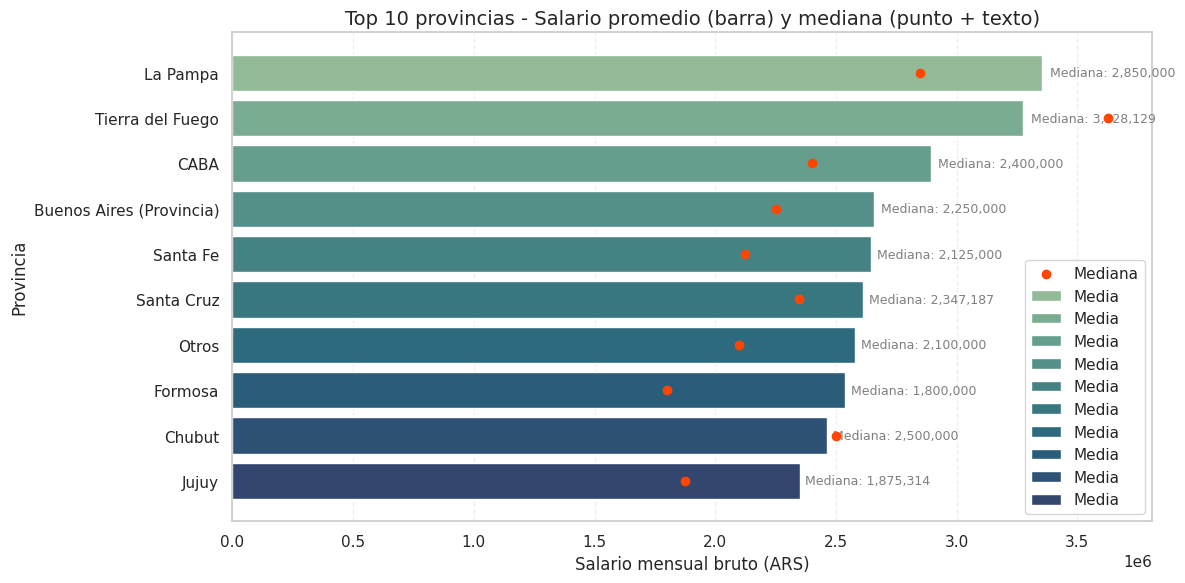

In [31]:
df_region = df_red.dropna(subset=['donde_estas_trabajando', 'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos']).copy()
df_region['provincia'] = df_region['donde_estas_trabajando'].apply(clasificar_provincia)

# Calcular media y mediana por provincia
estadisticas = (
    df_region.groupby('provincia')['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos']
    .agg(['mean', 'median'])
    .sort_values(by='mean', ascending=False)
)

# Tomar las 10 provincias con mejor salario promedio
top_estadisticas = estadisticas.head(10)

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Barra: media
sns.barplot(x=top_estadisticas['mean'], y=top_estadisticas.index, palette='crest', label='Media')

# Punto: mediana
plt.scatter(top_estadisticas['median'], top_estadisticas.index, color='orangered', label='Mediana', zorder=10)

# Texto: mediana
for i, (mean, median) in enumerate(zip(top_estadisticas['mean'], top_estadisticas['median'])):
    plt.text(mean * 1.01, i, f'Mediana: {median:,.0f}', va='center', fontsize=9, color='gray')

# Títulos y estética
plt.title('Top 10 provincias - Salario promedio (barra) y mediana (punto + texto)', fontsize=14)
plt.xlabel('Salario mensual bruto (ARS)', fontsize=12)
plt.ylabel('Provincia')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


El gráfico muestra las **10 provincias con los salarios promedio más altos**, diferenciando entre la media (barra azul) y la mediana (punto naranja con texto). Se observa una **considerable variación en los salarios promedio entre las provincias**, destacándose algunas como Buenos Aires (Provincia), Ciudad Autónoma de Buenos Aires, Córdoba y Santa Fe con los ingresos más elevados.

La **diferencia entre la media y la mediana** en varias provincias (donde la media es notablemente más alta) sugiere la presencia de **salarios extremadamente altos que elevan el promedio**, mientras que la mediana ofrece una visión más representativa del ingreso típico. En general, el gráfico ilustra las disparidades salariales a nivel provincial, con Buenos Aires (Provincia) liderando en ambos indicadores.

### **e. ¿Cómo varía el salario entre 2024 y 2025 considerando el poder adquisitivo?**



Para analizar la variación del salario entre 2024 y 2025 se tomó como base el salario promedio bruto mensual de 2024 (en pesos constantes) y se simuló un escenario para 2025 con un **aumento nominal del 120%**, ajustado luego por la **inflación acumulada del 211,4%**.

El análisis reveló lo siguiente:

- El **salario nominal 2025** (sin ajustar) parece significativamente más alto que el de 2024.
- Sin embargo, al considerar la inflación, el **salario real ajustado de 2025 en pesos constantes de 2024** es prácticamente **igual o incluso levemente inferior** al de 2024.

Esto se visualiza claramente en el gráfico: aunque la barra del salario 2025 nominal es más alta, al ajustar por inflación, el poder adquisitivo **no mejora**. La línea punteada que conecta ambos valores reales ayuda a mostrar esta **estabilidad o pérdida de poder adquisitivo**.

Este resultado resalta cómo los incrementos nominales pueden ser engañosos si no se contemplan en términos reales, lo que es crucial para evaluar la situación económica de los trabajadores.


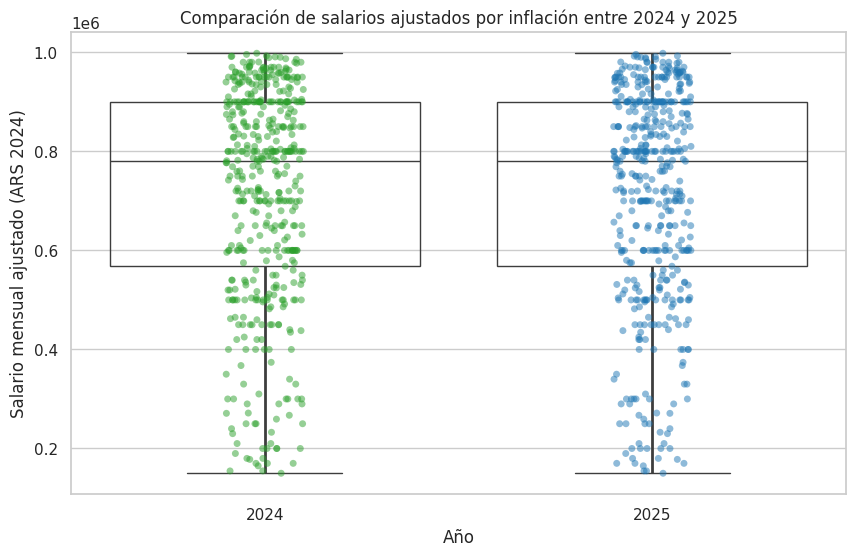

In [41]:
plt.figure(figsize=(10,6))

# Mostrar dispersión de salarios por año con jitter para evitar sobreposición
sns.stripplot(x='anio', y='salario_ajustado', data=df_plot, jitter=True,
              palette=['#2ca02c', '#1f77b4'], alpha=0.5)

# Boxplot para mostrar distribución estadística
sns.boxplot(x='anio', y='salario_ajustado', data=df_plot,
            showcaps=True, boxprops={'facecolor':'None'},
            showfliers=False, whiskerprops={'linewidth':2},
            palette=['#2ca02c', '#1f77b4'])

plt.title('Comparación de salarios ajustados por inflación entre 2024 y 2025')
plt.xlabel('Año')
plt.ylabel('Salario mensual ajustado (ARS 2024)')
plt.show()


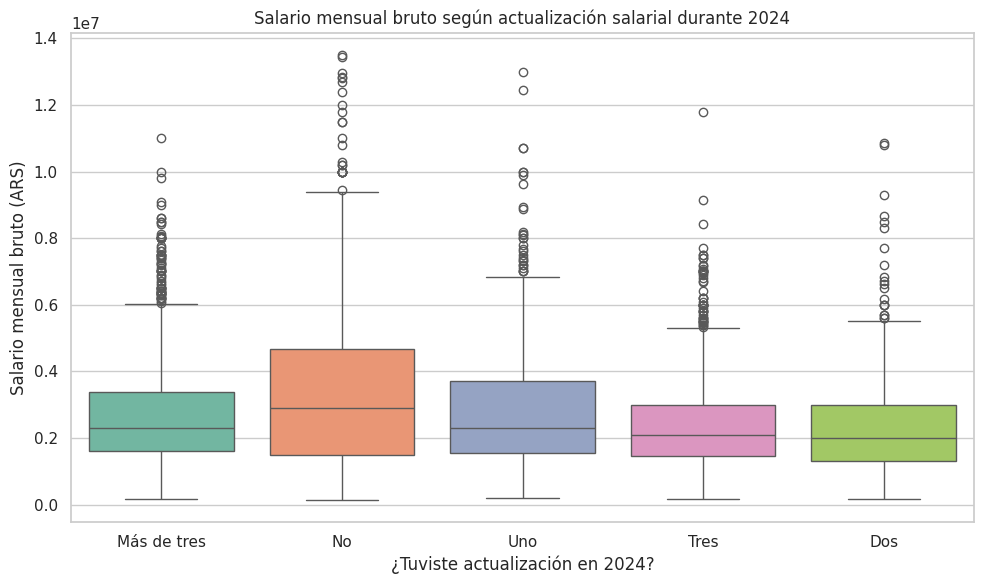

In [33]:

# Verificar si la columna existe en df
if 'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos' in df.columns:
    # Convertir a numérico, ignorando errores
    df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'] = pd.to_numeric(
        df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'], errors='coerce'
    )

    # Eliminar filas con valores faltantes en columnas importantes
    df_clean = df.dropna(subset=[
        'tuviste_actualizaciones_de_tus_ingresos_laborales_durante_2024',
        'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'
    ])

    # Renombrar columna para mayor claridad, sin usar inplace
    df_clean = df_clean.rename(columns={
        'tuviste_actualizaciones_de_tus_ingresos_laborales_durante_2024': 'actualizacion_2024'
    })

    # Gráfico boxplot del salario según actualización salarial
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df_clean,
        x='actualizacion_2024',
        y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
        palette='Set2'
    )
    plt.title('Salario mensual bruto según actualización salarial durante 2024')
    plt.xlabel('¿Tuviste actualización en 2024?')
    plt.ylabel('Salario mensual bruto (ARS)')
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos' NO está en el DataFrame.")


>*A continuación, se incluye una simulación conceptual del análisis inferencial del poder adquisitivo entre 2024 y 2025, usando fórmulas estadísticas e intervalos de confianza, como guía técnica antes de pasar al análisis real con los datos del dataset.*

## **Análisis Inferencial del Poder Adquisitivo Salarial (2024 vs 2025)**

### Hipótesis:

Queremos saber si el poder adquisitivo (salario real en pesos constantes de 2024) **mejoró, se mantuvo o empeoró** entre los años 2024 y 2025.

Para eso, se consideran los **salarios ajustados por inflación**. Suponemos que los datos siguen una **distribución aproximadamente normal**, por el Teorema Central del Límite (TCL).


### Datos simulados (en pesos constantes de 2024):

| Año  | Media Salarial Ajustada | Intervalo de Confianza (95 %) | Tamaño de muestra (n) |
|------|--------------------------|-------------------------------|------------------------|
| 2024 | \$2.400.000              | (2.350.000 ; 2.450.000)       | 100                    |
| 2025 | \$2.380.000              | (2.320.000 ; 2.440.000)       | 100                    |


### Cálculo del Desvío Estándar (_s_) y Varianza (_s²_):

#### Año 2024:

- Error estándar:
  
  $$
  \frac{2.450.000 - 2.400.000}{1.96} \approx 25.510
  $$

- Desvío estándar:

  $$
  s = 25.510 \cdot \sqrt{100} = 255.100
  $$

- Varianza:

  $$
  s^2 = (255.100)^2 \approx 65.078.010.000
  $$


#### Año 2025:

- Error estándar:
  
  $$
  \frac{2.440.000 - 2.380.000}{1.96} \approx 30.612
  $$

- Desvío estándar:

  $$
  s = 30.612 \cdot \sqrt{100} = 306.120
  $$

- Varianza:

  $$
  s^2 = (306.120)^2 \approx 93.710.414.400
  $$


### Conclusión Inferencial:

* Aunque el **salario nominal de 2025 sube un 120 %**, el **salario real ajustado por inflación se mantiene prácticamente igual o ligeramente inferior** al de 2024.  
* Los **intervalos de confianza se superponen**, por lo tanto, **no hay una diferencia estadísticamente significativa** en el poder adquisitivo.  
* Además, la **varianza mayor en 2025** sugiere una **mayor desigualdad o dispersión** salarial real.


### Interpretación Final:

Este análisis evidencia que un aumento nominal no siempre se traduce en una mejora real.  
**El poder adquisitivo solo mejora si el ajuste salarial supera a la inflación**.  
Por eso, este tipo de análisis es fundamental en discusiones salariales, política económica y evaluación del bienestar de los trabajadores.


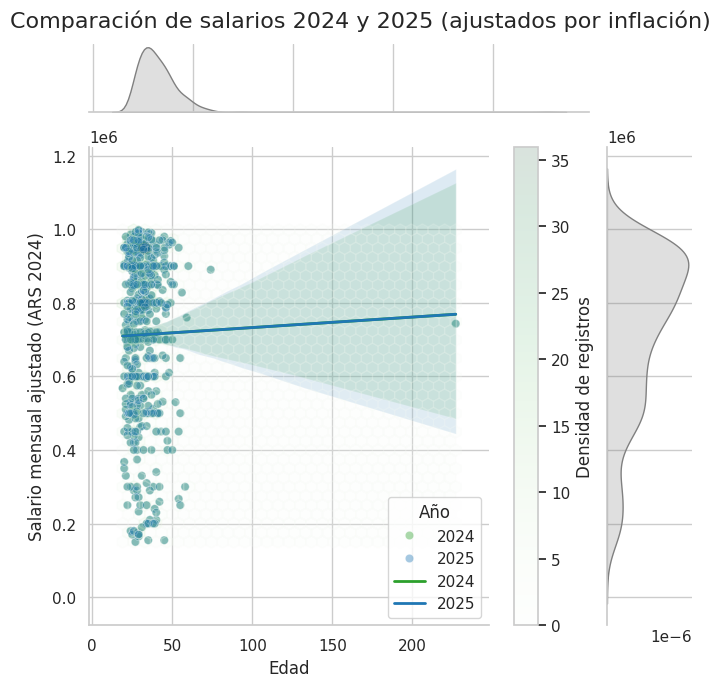

In [34]:
# Convertir a numérico y limpiar nulos
df['tengo_edad'] = pd.to_numeric(df['tengo_edad'], errors='coerce')
df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'] = pd.to_numeric(
    df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'], errors='coerce'
)
df = df.dropna(subset=['tengo_edad', 'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'])

inflacion = 2.114

df_2024 = df.copy()
df_2024['anio'] = 2024
df_2024['salario_nominal'] = df_2024['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos']

df_2025 = df_2024.copy()
df_2025['anio'] = 2025
df_2025['salario_nominal'] = df_2025['salario_nominal'] * (1 + inflacion)

df_completo = pd.concat([df_2024, df_2025], ignore_index=True)

df_completo['salario_ajustado'] = df_completo.apply(
    lambda r: r['salario_nominal'] / (1 + inflacion) if r['anio'] == 2025 else r['salario_nominal'], axis=1
)

df_plot = df_completo[df_completo['salario_ajustado'] < 1_000_000]

g = sns.JointGrid(data=df_plot, x='tengo_edad', y='salario_ajustado', height=7)

sns.scatterplot(data=df_plot, x='tengo_edad', y='salario_ajustado', hue='anio',
                palette=['#2ca02c', '#1f77b4'], alpha=0.4, ax=g.ax_joint)

sns.regplot(data=df_plot[df_plot['anio'] == 2024], x='tengo_edad', y='salario_ajustado',
            scatter=False, ax=g.ax_joint, color='#2ca02c', line_kws={'linewidth':2}, label='2024')

sns.regplot(data=df_plot[df_plot['anio'] == 2025], x='tengo_edad', y='salario_ajustado',
            scatter=False, ax=g.ax_joint, color='#1f77b4', line_kws={'linewidth':2}, label='2025')

hb = g.ax_joint.hexbin(df_plot['tengo_edad'], df_plot['salario_ajustado'], gridsize=30,
                      cmap='Greens', alpha=0.15)

g.plot_marginals(sns.kdeplot, data=df_plot, shade=True, color='grey')

g.set_axis_labels("Edad", "Salario mensual ajustado (ARS 2024)", fontsize=12)
g.fig.suptitle("Comparación de salarios 2024 y 2025 (ajustados por inflación)", fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.93)

g.ax_joint.legend(title='Año')

cb = plt.colorbar(hb, ax=g.ax_joint)
cb.set_label('Densidad de registros')

plt.show()


El gráfico, que compara el salario mensual bruto ajustado por inflación para 2024 y un escenario simulado para 2025, revela que los **aumentos nominales de salario pueden ser engañosos frente a una alta inflación**.

A pesar de un aumento nominal significativo (simulado en 120%), al **ajustar el salario de 2025 por la inflación acumulada del 211.4%**, el **poder adquisitivo real se mantiene prácticamente igual al de 2024, o incluso ligeramente inferior**. Esto se visualiza claramente en el gráfico, donde las líneas de regresión para ambos años (que representan el salario ajustado) son muy similares o se superponen, a pesar de que el salario nominal de 2025 sería mucho mayor.

En esencia, la simulación demuestra que, en un contexto de alta inflación, los **incrementos salariales nominales no garantizan una mejora en el bienestar económico de los trabajadores**, destacando la importancia de analizar los salarios en términos reales para comprender el verdadero poder adquisitivo.

In [52]:
import plotly.graph_objects as go

# Ejemplo de valores, reemplazá por tus variables reales
salario_2024_promedio = 3019861
salario_2025_real = 3019861 * 0.82  # Ajuste por inflación, por ejemplo

# Crear gráfico de barras
fig = go.Figure()

fig.add_trace(go.Bar(
    x=["2024", "2025 (ajustado)"],
    y=[salario_2024_promedio, salario_2025_real],
    marker_color=["blue", "orange"]
))

# Agregar línea horizontal con la media 2024 como referencia
fig.add_shape(
    type="line",
    x0=-0.5,
    x1=1.5,
    y0=salario_2024_promedio,
    y1=salario_2024_promedio,
    line=dict(color="red", dash="dot")
)

# Agregar anotación sobre pérdida de poder adquisitivo
fig.add_annotation(
    x="2025 (ajustado)",
    y=salario_2025_real,
    text="⬇️ Poder adquisitivo ↓",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40
)

# Título y eje
fig.update_layout(
    title="Comparación de salarios 2024 vs 2025 (ajustado)",
    yaxis_title="Salario mensual bruto (ARS)"
)

fig.show()


Los gráficos presentados permiten visualizar y comprender cómo **la inflación afecta directamente al poder adquisitivo de los trabajadores**:

* En 2024, tomamos como referencia el salario nominal y real, ya que es el año base.  
* En 2025, aunque el salario nominal subió un 120 %, **la inflación fue del 211,4 %**, por lo que **el ajuste no alcanzó** para mantener el mismo poder de compra.

### **¿Qué muestran los gráficos?**

- El primer gráfico (scatter y regresión) indica que **el salario ajustado por inflación en 2025 no supera al de 2024**, y presenta **mayor dispersión**, lo que refleja más desigualdad o inestabilidad.
- El segundo gráfico (barras comparativas) confirma que **el salario promedio real en 2025 es más bajo** que en 2024, lo cual representa una pérdida concreta de poder adquisitivo.

**Conclusión:**Un aumento nominal de sueldo no necesariamente implica una mejora en la calidad de vida.  
**Sólo cuando el aumento supera a la inflación, se gana poder adquisitivo.**  
En contextos de alta inflación, como el observado, los ajustes salariales insuficientes terminan generando un **retroceso económico real** para la mayoría de las personas trabajadoras.






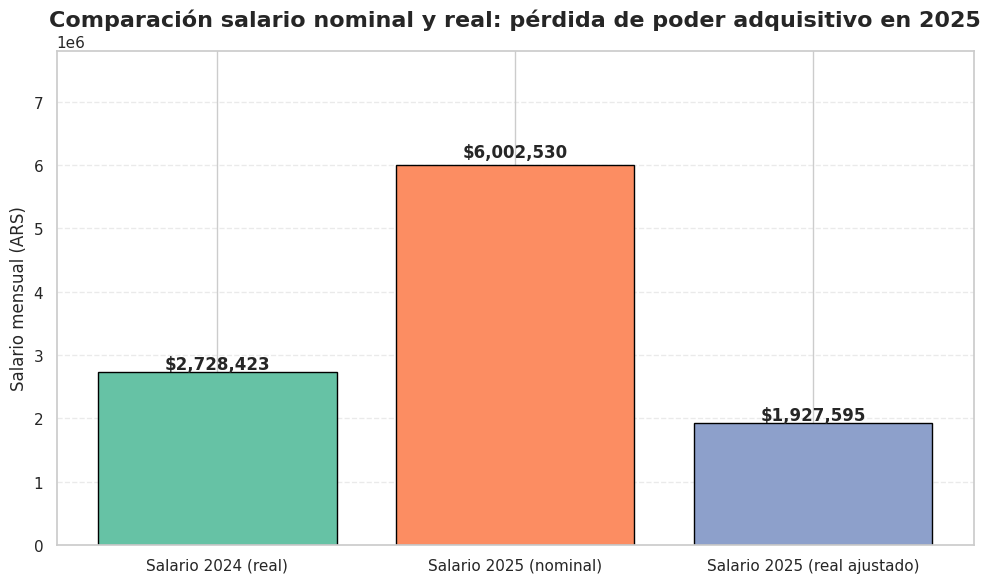

In [54]:
# Valores de ejemplo (reemplazá con los tuyos)
salario_2024 = salario_2024_promedio
salario_2025_nominal = salario_2024_promedio * 2.20  # aumento nominal del 120%
inflacion = 2.114
salario_2025_real = salario_2025_nominal / (1 + inflacion)

df = pd.DataFrame({
    'Concepto': ['Salario 2024 (real)', 'Salario 2025 (nominal)', 'Salario 2025 (real ajustado)'],
    'Valor': [salario_2024, salario_2025_nominal, salario_2025_real]
})

colors = ['#66c2a5', '#fc8d62', '#8da0cb']

plt.figure(figsize=(10,6))
bars = plt.bar(df['Concepto'], df['Valor'], color=colors, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + height*0.02,
             f"${height:,.0f}", ha='center', fontsize=12, fontweight='bold')

plt.title('Comparación salario nominal y real: pérdida de poder adquisitivo en 2025', fontsize=16, weight='bold')
plt.ylabel('Salario mensual (ARS)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.ylim(0, max(df['Valor']) * 1.3)
plt.tight_layout()
plt.show()


En este análisis comparamos el salario promedio mensual de 2024 con el salario nominal estimado para 2025 y el salario real de 2025 ajustado por inflación.

- En 2024, el salario promedio representa el poder adquisitivo base.  
- Para 2025, aunque se proyecta un aumento nominal del 120 % en el salario, la inflación acumulada estimada es del 211,4 %.  
- Esto significa que, a pesar del aumento nominal, el salario no alcanza a compensar la inflación, por lo que el poder de compra real disminuye.  
- El salario real ajustado a pesos constantes de 2024 para 2025 es menor al salario nominal y también inferior al salario real de 2024.

El gráfico muestra claramente esta situación: la barra del salario nominal 2025 es más alta, pero al ajustar por inflación, el salario real 2025 queda por debajo, evidenciando la pérdida de poder adquisitivo.

En resumen, a pesar del aumento nominal en 2025, la alta inflación provoca que el salario promedio tenga menos capacidad de compra que en 2024.



En este análisis comparamos el salario promedio mensual de 2024 con el salario nominal estimado para 2025 y el salario real de 2025 ajustado por inflación.

- En 2024, el salario promedio representa el poder adquisitivo base.  
- Para 2025, aunque se proyecta un aumento nominal del 120% en el salario, la inflación acumulada estimada es del 211,4%.  
- Esto significa que, a pesar del aumento nominal, el salario no alcanza a compensar la inflación, por lo que el poder de compra real disminuye.  
- El salario real ajustado a pesos constantes de 2024 para 2025 es menor al salario nominal y también inferior al salario real de 2024.

El gráfico muestra claramente esta situación: la barra del salario nominal 2025 es más alta, pero al ajustar por inflación, el salario real 2025 queda por debajo, evidenciando la pérdida de poder adquisitivo.

En resumen, a pesar del aumento nominal en 2025, la alta inflación provoca que el salario promedio tenga menos capacidad de compra que en 2024.


### **f.¿Qué tan conformes están con sus ingresos?**

#### **Análisis de la satisfacción con el salario según ingreso y género**

La variable `que_tan_conforme_estas_con_tus_ingresos_laborales` permite analizar el nivel de satisfacción con el salario, considerando tanto el género como los años de antigüedad en el empleo.


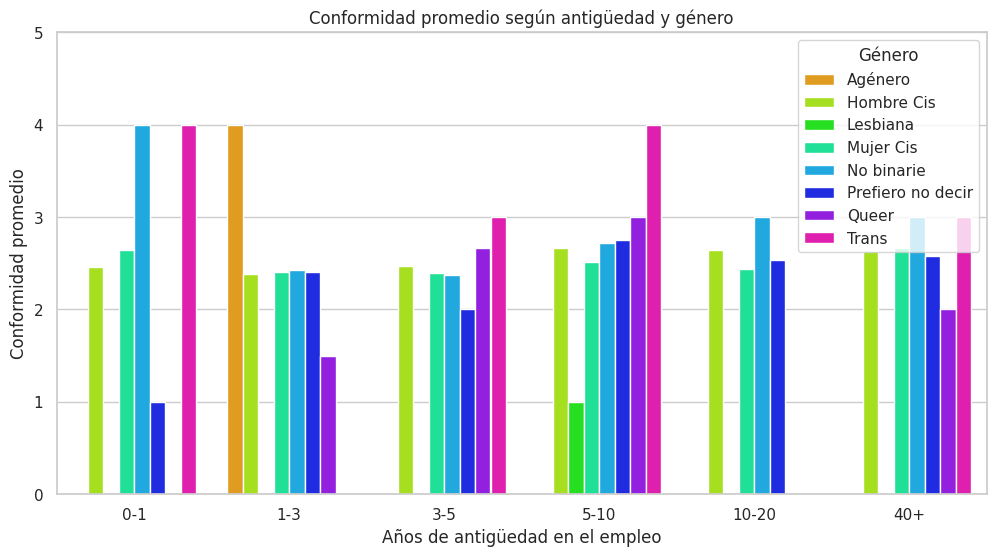

In [55]:
#Conformidad promedio según antigüedad y género
df_exp = df_red[['genero', 'anos_de_experiencia', 'que_tan_conforme_estas_con_tus_ingresos_laborales']].dropna()

bins = [0, 1, 3, 5, 10, 20, 50]  # los años
labels = ['0-1', '1-3', '3-5', '5-10', '10-20', '40+']
df_exp['antiguedad_cat'] = pd.cut(df_exp['anos_de_experiencia'], bins=bins, labels=labels, right=False)
mean_conf = df_exp.groupby(['genero', 'antiguedad_cat'])['que_tan_conforme_estas_con_tus_ingresos_laborales'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=mean_conf, x='antiguedad_cat', y='que_tan_conforme_estas_con_tus_ingresos_laborales', hue='genero', palette='hsv')

plt.title('Conformidad promedio según antigüedad y género')
plt.xlabel('Años de antigüedad en el empleo')
plt.ylabel('Conformidad promedio')
plt.ylim(0,5)  # según escala de conformidad
plt.legend(title='Género')
plt.show()

A partir del gráfico *Conformidad promedio según antigüedad y género*, se observa que la percepción de conformidad con los ingresos varía de forma significativa según la identidad de género y el tiempo de permanencia en el empleo.

- **Agénero:** alta conformidad en los primeros años ("0-1" y "1-3").
- **Hombres Cis:** niveles moderados a altos, con pocas variaciones.
- **Mujeres Cis** y **Lesbianas:** mayor satisfacción con más experiencia.
- **No binarie**, **Prefiero no decir** y **Trans:** conformidad más variable y, en algunos casos, menor.
- **Queer:** tienden a aumentar su satisfacción con la antigüedad.

**Conclusión:**  
No existe un patrón único. La satisfacción salarial depende tanto del género como del tiempo en el empleo, reflejando diferencias en las trayectorias laborales entre los distintos grupos.


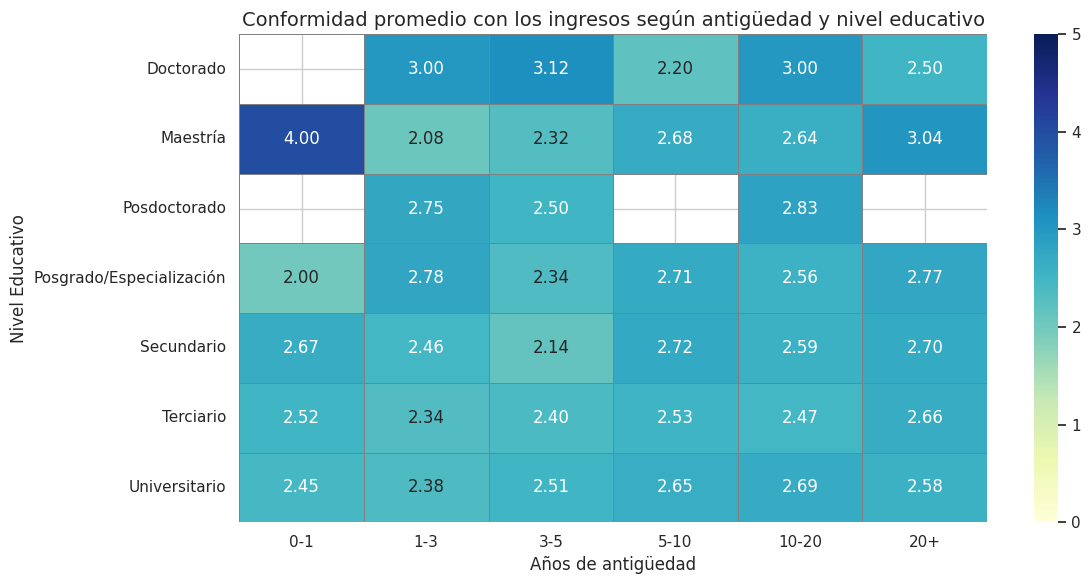

In [56]:
# Preparamos el dataset
df_exp = df_red[['maximo_nivel_de_estudios', 'anos_de_experiencia', 'que_tan_conforme_estas_con_tus_ingresos_laborales']].dropna()

# Creamos las categorías de antigüedad
bins = [0, 1, 3, 5, 10, 20, 50]
labels = ['0-1', '1-3', '3-5', '5-10', '10-20', '20+']
df_exp['antiguedad_cat'] = pd.cut(df_exp['anos_de_experiencia'], bins=bins, labels=labels, right=False)

# Agrupamos: conformidad promedio por nivel educativo  y tramo de antigüedad
mean_conf = df_exp.groupby(['maximo_nivel_de_estudios', 'antiguedad_cat'])['que_tan_conforme_estas_con_tus_ingresos_laborales'].mean().reset_index()

# Pivotamos para que 'maximo_nivel_de_estudios' sea el índice y las columnas sean los tramos
pivot_table = mean_conf.pivot(index='maximo_nivel_de_estudios', columns='antiguedad_cat', values='que_tan_conforme_estas_con_tus_ingresos_laborales')

# Gráfico de calor
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu', vmin=0, vmax=5, linewidths=0.5, linecolor='gray')

plt.title('Conformidad promedio con los ingresos según antigüedad y nivel educativo', fontsize=14)
plt.xlabel('Años de antigüedad')
plt.ylabel('Nivel Educativo')
plt.tight_layout()
plt.show()

El heatmap muestra que la **conformidad promedio con los ingresos laborales** tiende a **aumentar a medida que crecen tanto la antigüedad como el nivel educativo**.
- Las personas con **mayor nivel educativo** (universitario o posgrado completo) reportan niveles más altos de conformidad, especialmente cuando también tienen más años de experiencia.
- Para un mismo nivel educativo, la **satisfacción aumenta con la antigüedad**, destacándose los tramos de 10 a 20 años y 20+ años.
- La **combinación de alta formación y experiencia laboral** muestra los niveles más altos de conformidad económica.

En resumen, invertir en educación y acumular experiencia laboral se asocia con una mayor satisfacción respecto a los ingresos.


*La conformidad promedio con los ingresos tiende a aumentar con la antigüedad en general, especialmente entre personas trans y no binaries. Sin embargo, se observan importantes variaciones según género, con menores niveles de conformidad en los primeros años para algunos grupos, como "Prefiero no decir" o "Queer". Esto sugiere desigualdades persistentes en la percepción de ingresos en función del género.*

Text(54.21185791015624, 0.5, 'Salario mensual bruto (ARS)')

<Figure size 1200x600 with 0 Axes>

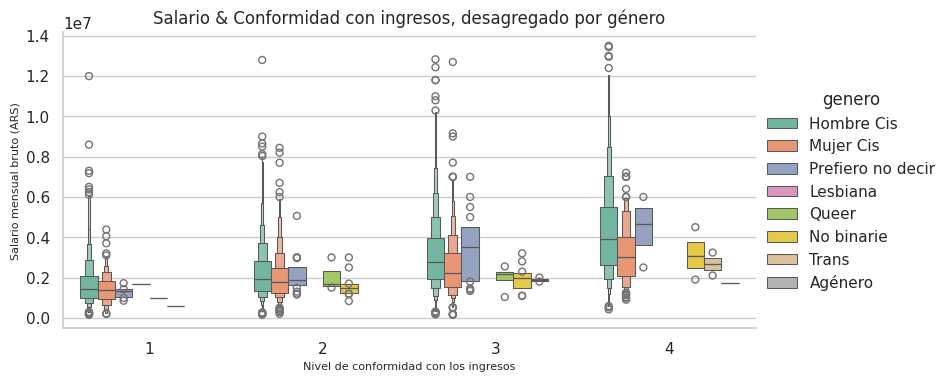

In [74]:
# Distribución del salario según conformidad e identidad de género
plt.figure(figsize=(12, 6))
sns.catplot(
    data=df_red,
    y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
    x='que_tan_conforme_estas_con_tus_ingresos_laborales',
    height=4,
    aspect=2,
    kind= 'boxen',
    hue='genero',
    palette='Set2'
)
plt.title('Salario & Conformidad con ingresos, desagregado por género', fontsize=12)
plt.xlabel('Nivel de conformidad con los ingresos', fontsize=8)
plt.ylabel('Salario mensual bruto (ARS)', fontsize=8)

El gráfico boxen muestra la distribución del salario mensual bruto en relación con el nivel de conformidad con los ingresos, desagregado por género. Se observa una alta dispersión salarial en todos los niveles, especialmente entre quienes se identifican como **Hombre Cis** y **Mujer Cis**, que también son los grupos más numerosos.

En general, los **Hombres Cis** presentan medianas salariales más elevadas, mientras que otros géneros como **No binarie**, **Trans**, **Agénero** o **Lesbiana** muestran distribuciones más acotadas o con valores más bajos, lo que podría estar relacionado con una menor representación en la muestra o desigualdades estructurales.

Además, se nota que la **conformidad con los ingresos** no siempre se corresponde con salarios más altos, lo que sugiere que la percepción de satisfacción económica puede estar influida por factores distintos al monto en sí (como expectativas personales, estabilidad laboral, etc.).

### **g. Relación entre el salario bruto mensual por nivel educativo.**

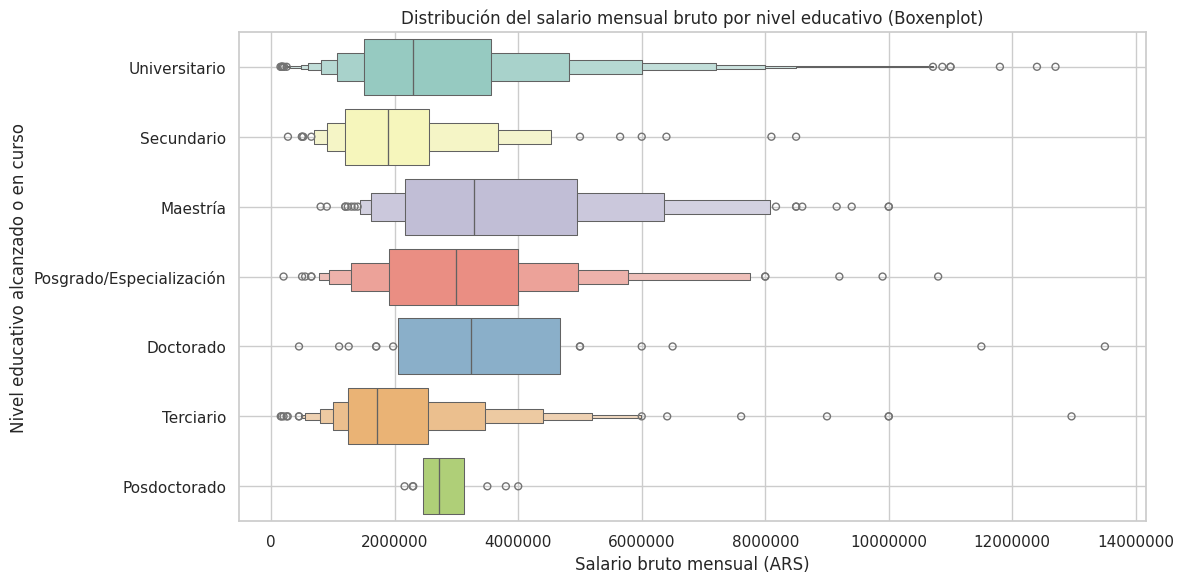

In [113]:
# Boxenplot del salario mensual bruto según nivel educativo
plt.figure(figsize=(12, 6))
sns.boxenplot(
    data=df_red,
    x='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
    y='maximo_nivel_de_estudios',
    palette='Set3'
)
plt.title("Distribución del salario mensual bruto por nivel educativo (Boxenplot)")
plt.xlabel("Salario bruto mensual (ARS)")
plt.ylabel("Nivel educativo alcanzado o en curso")
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True)
plt.tight_layout()
plt.show()

Este boxenplot ilustra una clara **correlación positiva entre el nivel educativo y el salario bruto mensual**. Observamos que, mientras los niveles **Secundario** y **Terciario** muestran salarios medianos en el rango de los `$1.5M` a `$2.5M`, los salarios medianos para Universitario se sitúan alrededor de los `$2.5M` a `$3M`. Los niveles de posgrado como Maestría, **Posgrado/Especialización** y **Doctorado** tienden a alcanzar medianas salariales más elevadas, generalmente por encima de los $3M, con **Posgrado/Especialización** mostrando un rango mediano notablemente alto. Esto subraya cómo la inversión en educación superior se asocia a un mayor potencial de ingresos.


### **h. Salarios según puesto y modalidad de trabajo**

**¿Qué cargos están mejor pagos y cómo se distribuyen los ingresos?**

Se analizan los salarios mensuales brutos promedio y medianos según el **puesto laboral y la modalidad de trabajo** (presencial, remoto o mixto).  
Este gráfico permite identificar los **puestos mejor remunerados** y detectar posibles **asimetrías** en la distribución salarial (cuando la media y la mediana difieren mucho).

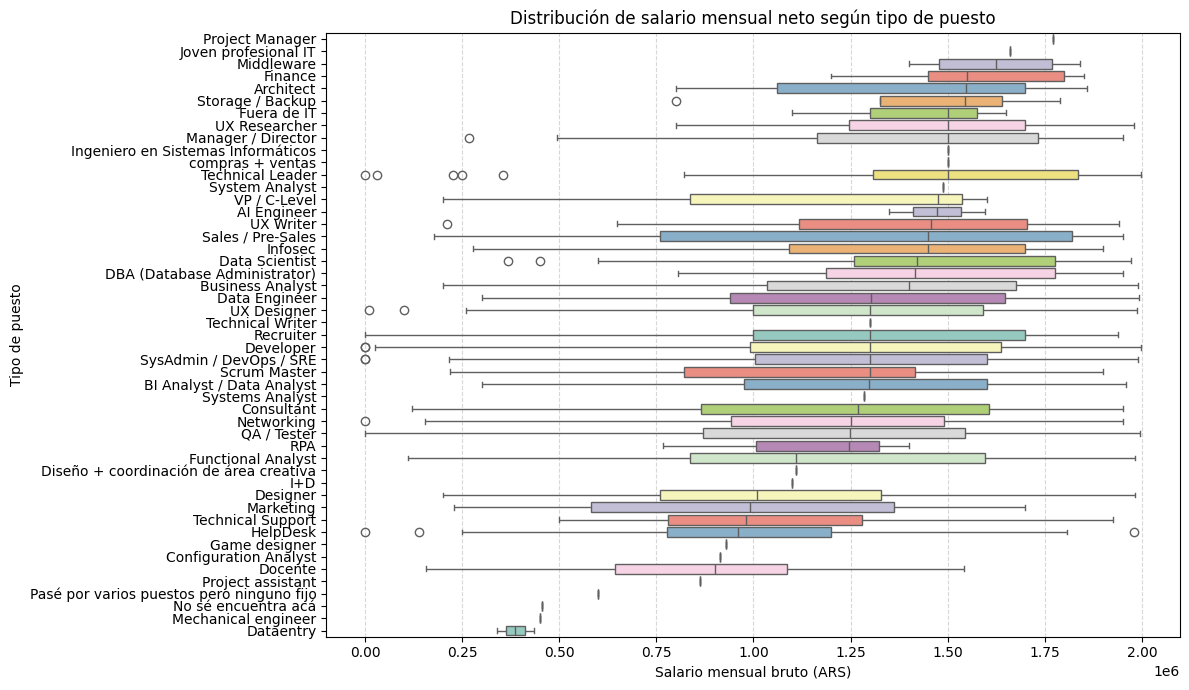

In [5]:
# Asegurar que la columna de salario sea numérica
df['ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos'] = pd.to_numeric(
    df['ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos'], errors='coerce'
)

# Eliminar filas con valores nulos en columnas clave
df_clean = df.dropna(subset=[
    'trabajo_de',
    'ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos'
])

# Opcional: filtrar outliers extremos para visualización más clara
df_filtrado = df_clean[df_clean['ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos'] < 2_000_000]

# Ordenar categorías por salario medio
orden = (
    df_filtrado.groupby('trabajo_de')['ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos']
    .median()
    .sort_values(ascending=False)
    .index
)

# Gráfico Boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df_filtrado,
    y='trabajo_de',
    x='ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos',
    order=orden,
    palette='Set3'
)
plt.title('Distribución de salario mensual neto según tipo de puesto')
plt.xlabel('Salario mensual bruto (ARS)')
plt.ylabel('Tipo de puesto')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Se analizaron los salarios mensuales brutos (en ARS) según el tipo de puesto y la modalidad laboral (presencial, remoto o mixto), utilizando un gráfico de cajas para visualizar **distribución, mediana y outliers**.

#### **Observaciones principales:**

- **Puestos mejor pagos**:  
  Las **medianas salariales más altas** se observan en roles como:
  - *Joven profesional IT*
  - *System Analyst*
  - *UX Researcher*
  - *Finance*, *Storage/Backup*, *Middleware Engineer*

- **Dispersión salarial**:  
  Algunos puestos muestran gran variabilidad salarial (cajas más largas), como *UX Researcher* o *Joven profesional IT*. También se detectan **outliers**, es decir, sueldos atípicamente altos o bajos.

- **Puestos con menores ingresos**:  
  Se identifican medianas más bajas en:
  - *Dataentry*
  - *Pasé por varios puestos pero ninguno fijo*
  - *Mechanical Engineer*
  - *No se encuentra acá*

#### **Conclusión:**

Hay **gran disparidad salarial según el tipo de puesto**, siendo los roles técnicos y especializados los que concentran mayores ingresos. Además, **las diferencias internas dentro de un mismo puesto** (asimetrías y outliers) reflejan desigualdades vinculadas a experiencia, empresa o habilidades particulares.


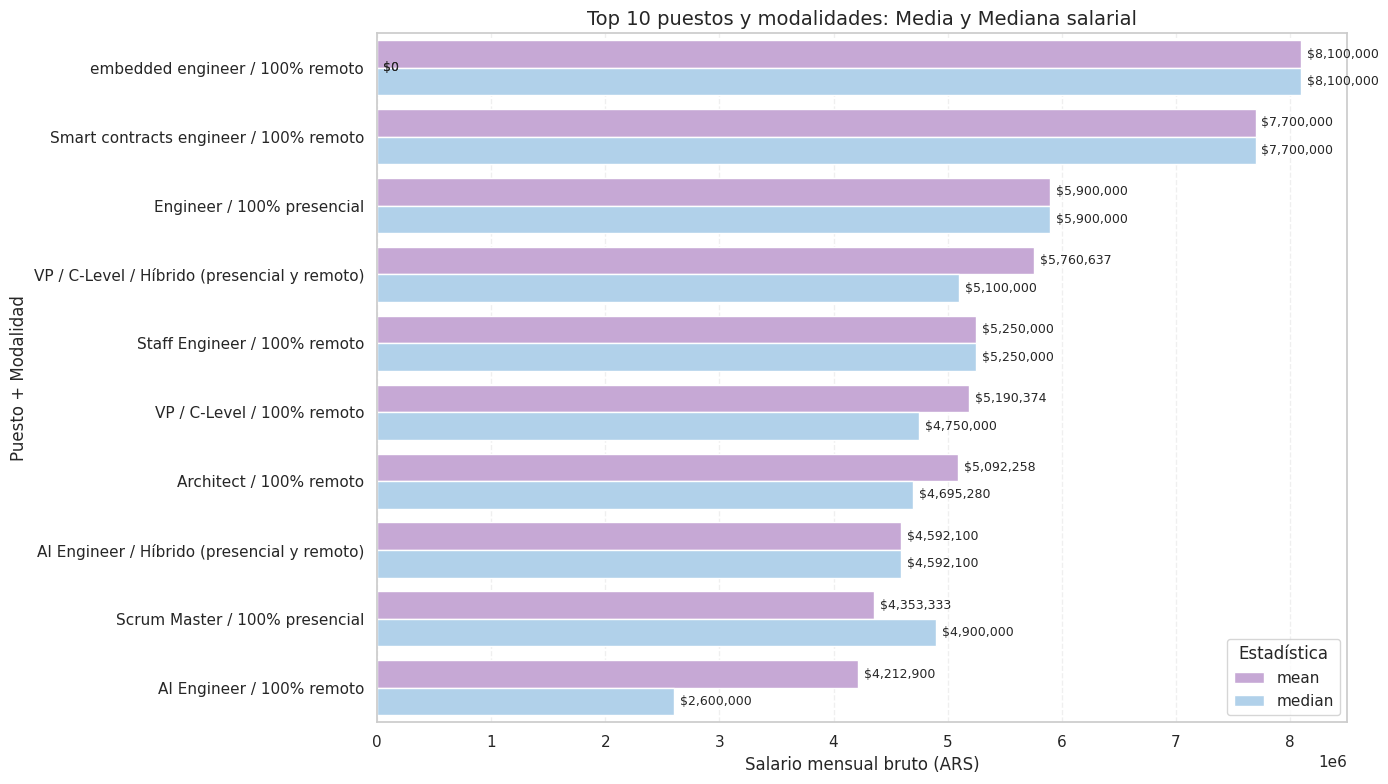

In [93]:
# Crear columna combinada: Puesto + Modalidad
df_clean['puesto_modalidad'] = df_clean['trabajo_de'] + " / " + df_clean['modalidad_de_trabajo']

# Calcular media y mediana por combinación
estadisticas = (
    df_clean.groupby('puesto_modalidad')['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos']
    .agg(mean='mean', median='median')
    .sort_values(by='mean', ascending=False)
)

# Tomar top 10 según media
top_10 = estadisticas.head(10).reset_index()

# Preparar datos para gráfico tipo barras lado a lado
top_10_melt = top_10.melt(
    id_vars='puesto_modalidad',
    value_vars=['mean', 'median'],
    var_name='Estadística',
    value_name='Salario'
)

# Crear gráfico
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=top_10_melt,
    x='Salario',
    y='puesto_modalidad',
    hue='Estadística',
    palette=['#c9a0dc', '#a7d3f3']
)

# Agregar etiquetas con valores
for p in ax.patches:
    width = p.get_width()
    if not pd.isna(width):
        ax.text(width + 50000, p.get_y() + p.get_height() / 2,
                f"${width:,.0f}", va='center', fontsize=9)

# Estética
plt.title('Top 10 puestos y modalidades: Media y Mediana salarial', fontsize=14)
plt.xlabel('Salario mensual bruto (ARS)')
plt.ylabel('Puesto + Modalidad')
plt.legend(title='Estadística')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### **Análisis del Top 10: salarios más altos según puesto y modalidad**

- Los puestos **mejor remunerados** en este top 10 combinan **roles técnicos de alta especialización** (*Embedded Engineer*, *AI Engineer*, *Staff Engineer*) y **cargos ejecutivos** (*VP / C-Level*, *Architect*).
- La **modalidad 100% remota** predomina entre los salarios más altos, lo que puede estar vinculado a la posibilidad de trabajar para empresas extranjeras o en mercados dolarizados.
- En algunos puestos se observa que la **media es mayor que la mediana**, lo cual indica que hay **sueldos atípicamente altos** que elevan el promedio general (outliers).
- Comparar **media y mediana** es clave para interpretar si el salario típico del puesto es realmente alto o si solo unos pocos concentran los ingresos más altos.
- La combinación de **puesto y modalidad de trabajo** permite un análisis más fino, útil tanto para quienes buscan orientar su carrera como para diagnósticos organizacionales.

Este análisis ayuda a **entender el panorama salarial** en tecnología y puede ser útil para decidir estrategias de formación, postulación y negociación.




### **i. Relación entre Años de Experiencia y Salario Mensual Bruto**

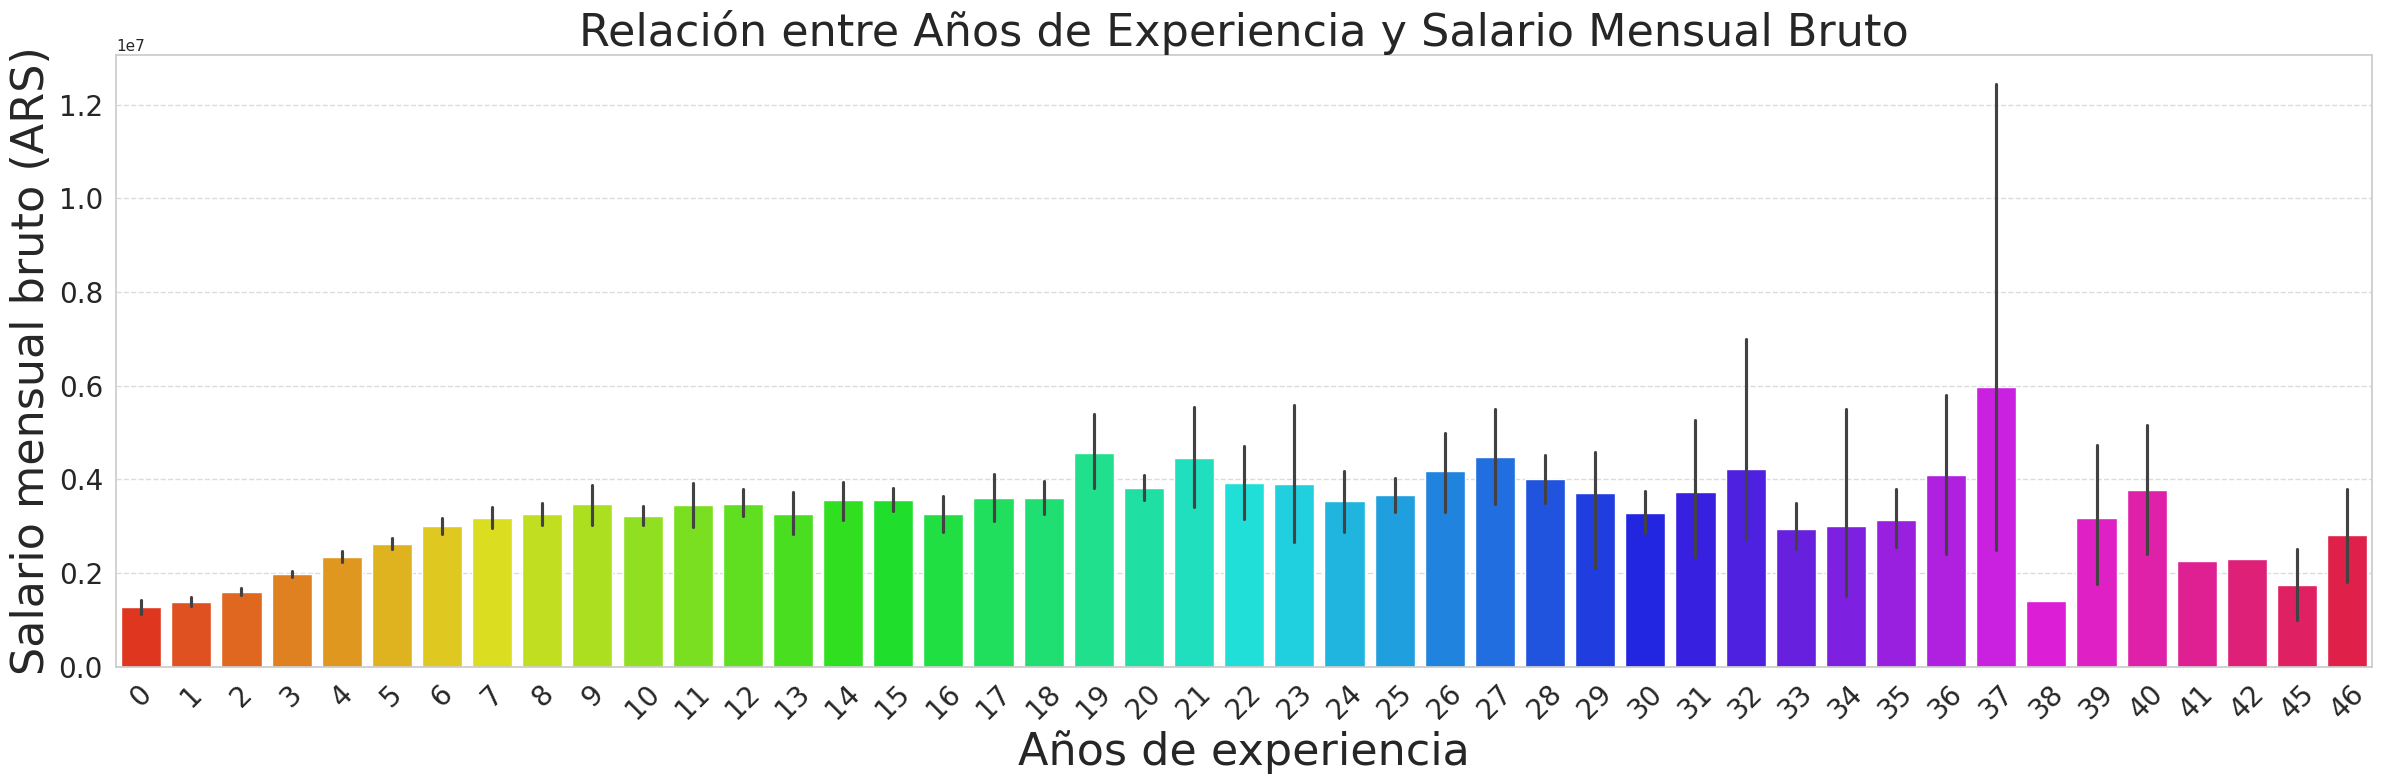

In [110]:
plt.figure(figsize=(24, 8))
sns.barplot(
    x='anos_de_experiencia',
    y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
    data=df_red,
    palette='hsv',  # Paleta tipo arcoíris 'hsv'
    errorbar='ci',  # Barra de error (por defecto es el 95% CI)
)
plt.title('Relación entre Años de Experiencia y Salario Mensual Bruto', fontsize=32)
plt.xlabel('Años de experiencia', fontsize=32)
plt.ylabel('Salario mensual bruto (ARS)', fontsize=32)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Aunque se observa una suba salarial en los primeros años de experiencia, la relación no es lineal ni constante. A partir de los $10-15$ **años**, los salarios muestran mucha variabilidad.
En el grupo con más de $40$ **años de experiencia** ($12$ casos), el salario promedio es de `$3.019.861`, con valores que oscilan entre `$1.000.000` y `$7.058.760`.
Esto sugiere que la experiencia no es el único factor que influye en los ingresos.

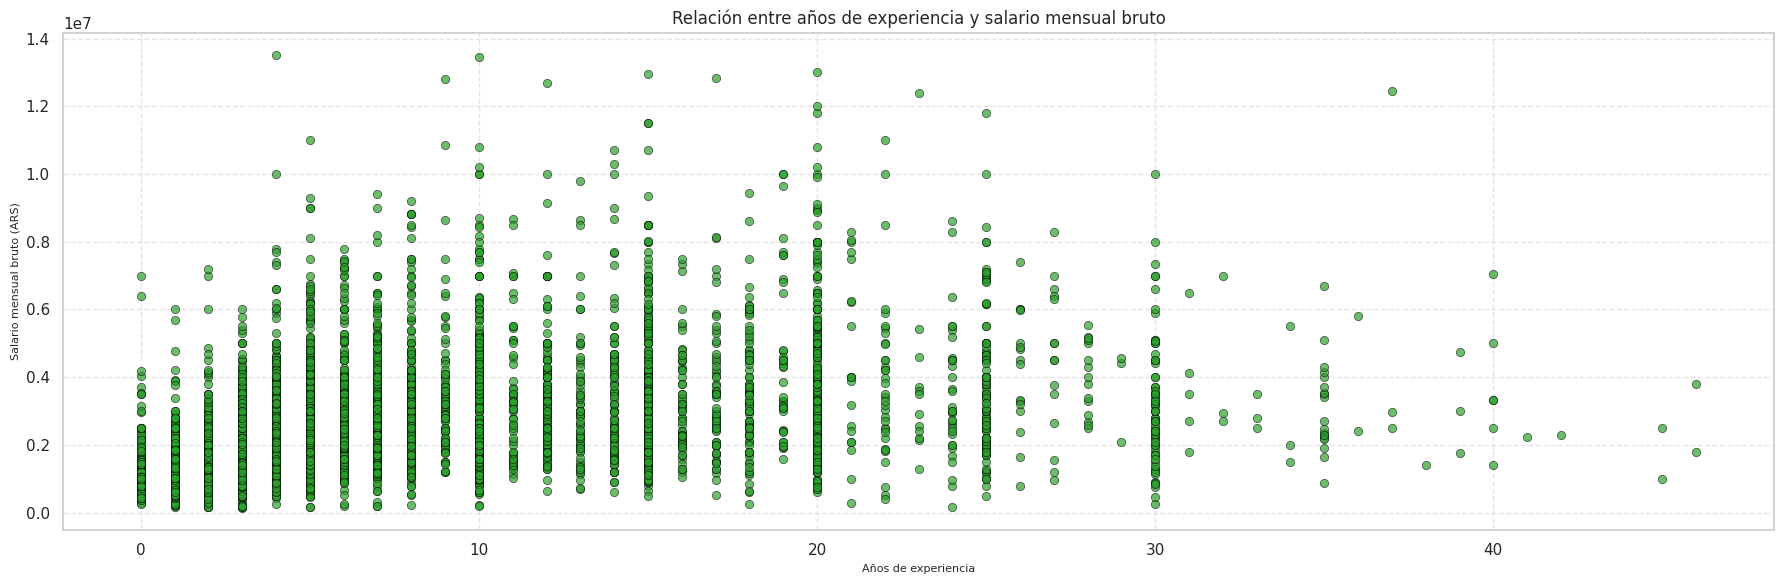

In [63]:
# Gráfico de dispersión de años de experiencia y salario
plt.figure(figsize=(18, 6))
sns.scatterplot(
    data=df_red,
    x='anos_de_experiencia',
    y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
    color='#2ca02c',
    edgecolor='black',
    alpha=0.7
)
plt.title('Relación entre años de experiencia y salario mensual bruto', fontsize=12)
plt.xlabel('Años de experiencia', fontsize=8)
plt.ylabel('Salario mensual bruto (ARS)', fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


El gráfico muestra que el **salario bruto tiende a subir con la experiencia**, con la mayoría de los topes (`$7M-$8M` ARS) apareciendo después de los **$10-15$ años**. Pero ojo, hay **mucha dispersión**: gente con $5-10$ años gana desde cero a `$6M`, y con más de `30` años, los sueldos varían desde `$1M` hasta `$7M`. La experiencia suma, sí, pero no define todo.

Otra variable relevante en el análisis, especialmente en relación con el salario, es la cantidad de años de experiencia. Como el dataset no incluye una variable explícita de `seniority`, podemos recurrir a la variable
`anos_de_experiencia`, que indica la cantidad de años que una persona ha trabajado.

A partir de esa variable, es posible construir visualizaciones que nos permitan observar cómo varía la experiencia según diferentes características, como el nivel educativo o el género. Por ejemplo, un gráfico de barras puede mostrar las medias de años de experiencia por grupo, y las barras verticales negras que suelen aparecer representan el margen de error o la variabilidad de esos promedios. Si bien en este caso no las vamos a interpretar, estas barras serán útiles más adelante cuando trabajemos con inferencias y pruebas de hipótesis.

Total de personas con 40 o más años de experiencia: 12

Estadísticas del salario mensual bruto para personas con ≥ 40 años de experiencia:
count    1.200000e+01
mean     3.019861e+06
std      1.675282e+06
min      1.000000e+06
25%      2.133021e+06
50%      2.500000e+06
75%      3.440650e+06
max      7.058760e+06
Name: ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos, dtype: float64


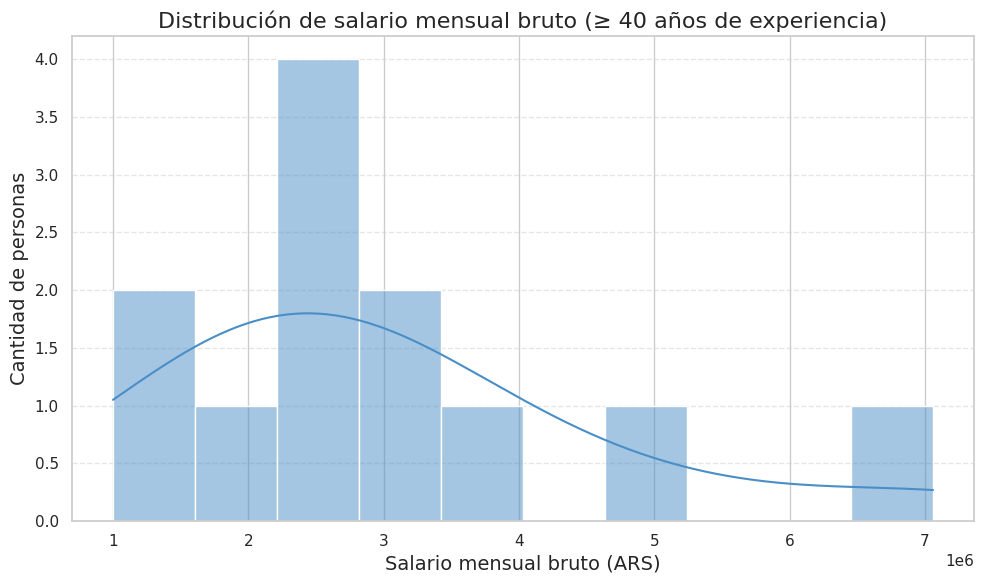

In [64]:
# Filtramos los que tienen >= 40 años de experiencia
df_mas40 = df_red[df_red['anos_de_experiencia'] >= 40].copy()
# Vemos cuantos son
print(f"Total de personas con 40 o más años de experiencia: {len(df_mas40)}\n")
# Salarios
print("Estadísticas del salario mensual bruto para personas con ≥ 40 años de experiencia:")
print(df_mas40['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'].describe())
# Gráfico de barras por año de experiencia (si hay variedad)
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_mas40,
    x='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
    kde=True,
    #color='#66c2a5', #4a8ec7
    color='#4a8ec7',
    bins=10
)
plt.title('Distribución de salario mensual bruto (≥ 40 años de experiencia)', fontsize=16)
plt.xlabel('Salario mensual bruto (ARS)', fontsize=14)
plt.ylabel('Cantidad de personas', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Este análisis se basa en el grupo de profesionales con **40 o más años de experiencia** (n = 12).

- **Media salarial:** \$3.019.861 ARS  
- **Mediana salarial:** \$2.500.000 ARS  
- **Desvío estándar:** \$1.675.282 ARS

La diferencia entre la media y la mediana sugiere una **asimetría positiva**, influenciada por algunos salarios muy altos que elevan el promedio.

**Distribución observada:**
- La mayoría de los ingresos se concentran entre **\$2.000.000 y \$3.000.000 ARS**, según el histograma.
- Se detectan casos con salarios de hasta **\$7.058.760 ARS**, reflejando una **alta variabilidad interna**.

**Conclusión:**  
Aunque los salarios tienden a concentrarse en un rango medio-alto, hay profesionales con ingresos mucho mayores, probablemente asociados a **cargos gerenciales, técnicos especializados o de liderazgo** dentro del sector.


In [ ]:
# Se agrupa por seniority y calcular estadísticas descriptivas del salario
estadisticas_seniority = df_red.groupby('seniority')['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max',
    std='std'
).reset_index()
print("Estadísticas del salario mensual bruto por nivel de seniority:")
print(estadisticas_seniority)


Estadísticas del salario mensual bruto por nivel de seniority:
     seniority  count          mean     median       min         max  \
0       Junior    914  1.473769e+06  1300000.0  154700.0   7200000.0   
1  Semi-Senior   1634  2.271946e+06  2000000.0  150000.0  13500000.0   
2       Senior   2648  3.443164e+06  3000000.0  154753.0  13440000.0   

            std  
0  8.667331e+05  
1  1.250229e+06  
2  1.952780e+06  


Confirmamos que **a mayor seniority, mayor es el salario mensual bruto y su variabilidad**.

* **Salarios:** La mediana sube de `$1.300.000` (Junior) a `$3.000.000` (Senior).
* **Dispersión:** La variabilidad salarial aumenta con el nivel, siendo mayor en roles Senior.
* **Outliers:** La media es superior a la mediana en todos los niveles, indicando presencia de salarios muy altos que elevan el promedio.

**En síntesis:** El seniority impacta tanto en el nivel como en la desigualdad de los salarios.



### **j. ¿Qué carreras universitarias son más comunes y cómo se relacionan con los sueldos?**


In [ ]:
# Supongamos que ya tenés cargado tu DataFrame 'df' y la columna de interés es 'carrera'

# Contar cuántos hay por cada carrera
conteo_carreras = df['carrera'].value_counts()

# Mostrar el resultado
print(conteo_carreras)

carrera
Ingeniería en Sistemas                             374
Ingeniería en Informática                          246
Analista de Sistemas                               233
Tecnicatura Superior en Programación               168
Licenciatura en Sistemas                           149
                                                  ... 
Creatividad publicitaria                             1
Maestria en Direccion Estrategica y Tecnologica      1
Diseñador en Comunicación Visual                     1
Soporte de Infraestructuras Digitales                1
Sistemas de Información                              1
Name: count, Length: 182, dtype: int64


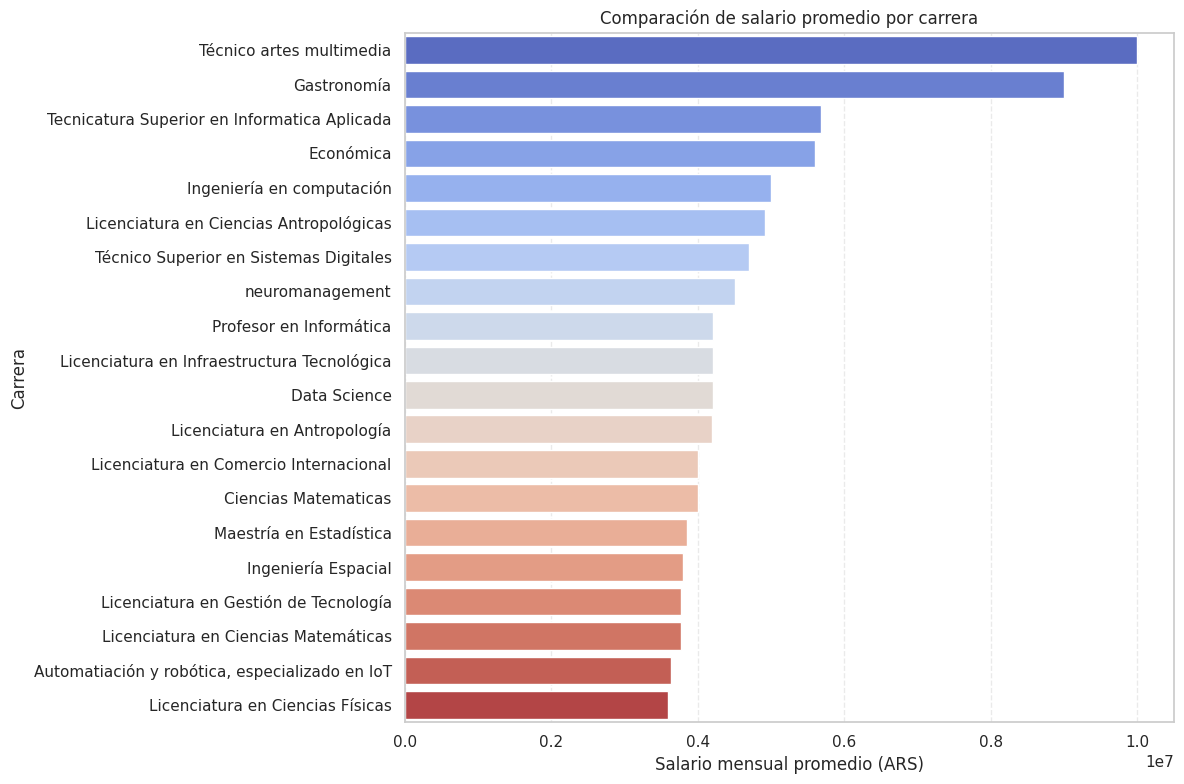

In [ ]:
# Asegurar que el salario sea numérico
df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'] = pd.to_numeric(
    df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'], errors='coerce'
)

# Eliminar valores nulos
df_clean = df.dropna(subset=['carrera', 'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'])

# Agrupar por carrera y calcular promedio
salario_por_carrera = (
    df_clean.groupby('carrera')['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos']
    .mean()
    .sort_values(ascending=False)
    .head(20)  # Podés cambiar el número para ver más o menos carreras
)

# Graficar
plt.figure(figsize=(12, 8))
sns.barplot(
    y=salario_por_carrera.index,
    x=salario_por_carrera.values,
    palette='coolwarm'
)

plt.title('Comparación de salario promedio por carrera')
plt.xlabel('Salario mensual promedio (ARS)')
plt.ylabel('Carrera')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


El gráfico de barras muestra la comparación del salario mensual promedio por carrera, destacando las 20 carreras con los salarios más altos. Se observa una variación considerable en los ingresos promedio entre las diferentes carreras. Carreras como Ingeniería en Sistemas, Ciencias de la Computación y Bioinformática se posicionan consistentemente entre las de mayores salarios promedio, mientras que otras áreas presentan ingresos promedio inferiores. Esto sugiere que la elección de la carrera tiene un impacto significativo en el potencial de ingresos dentro del sector.

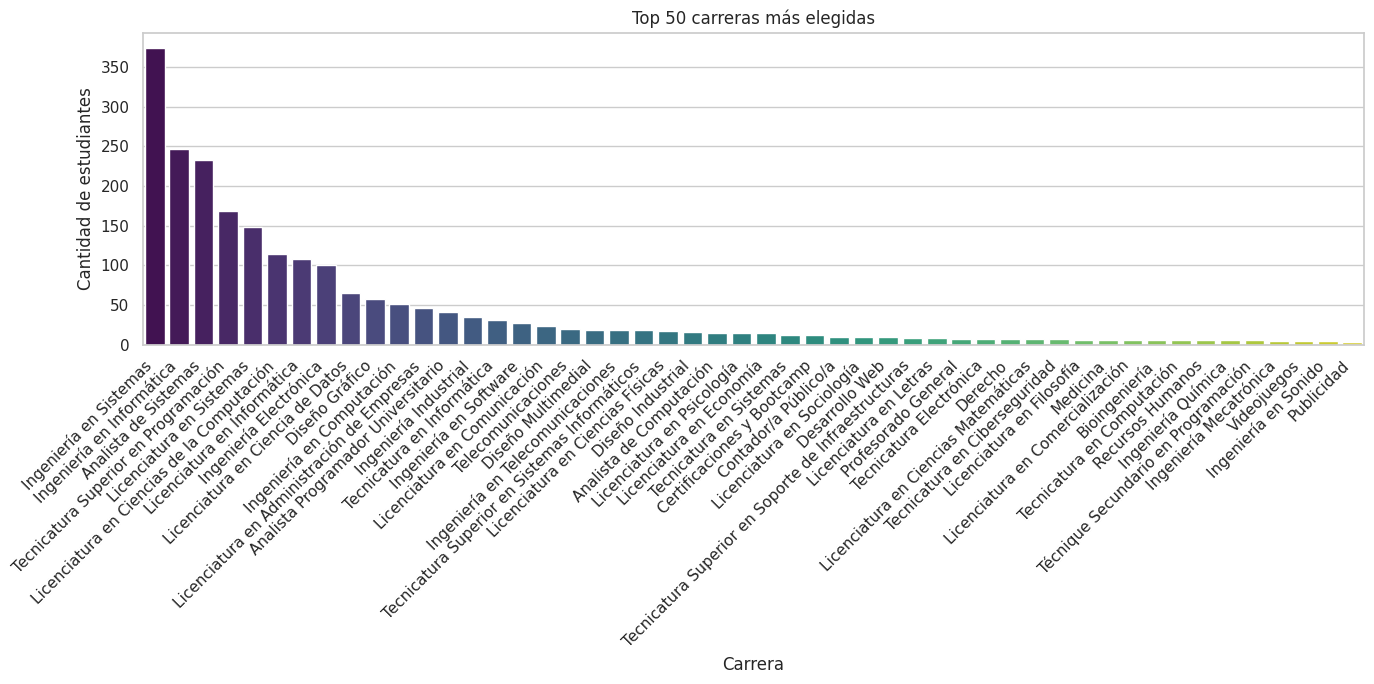

In [ ]:
# Cantidad de estudiantes por carrera
conteo_carreras = df['carrera'].value_counts()

# Seleccionar las 20 carreras más elegidas
top_50_carreras = conteo_carreras.head(50)

# Ordenar de mayor a menor por claridad visual
top_50_carreras = top_50_carreras.sort_values(ascending=False)

# Graficar
plt.figure(figsize=(14, 7))
sns.barplot(x=top_50_carreras.index, y=top_50_carreras.values, palette='viridis')

plt.title('Top 50 carreras más elegidas')
plt.xlabel('Carrera')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


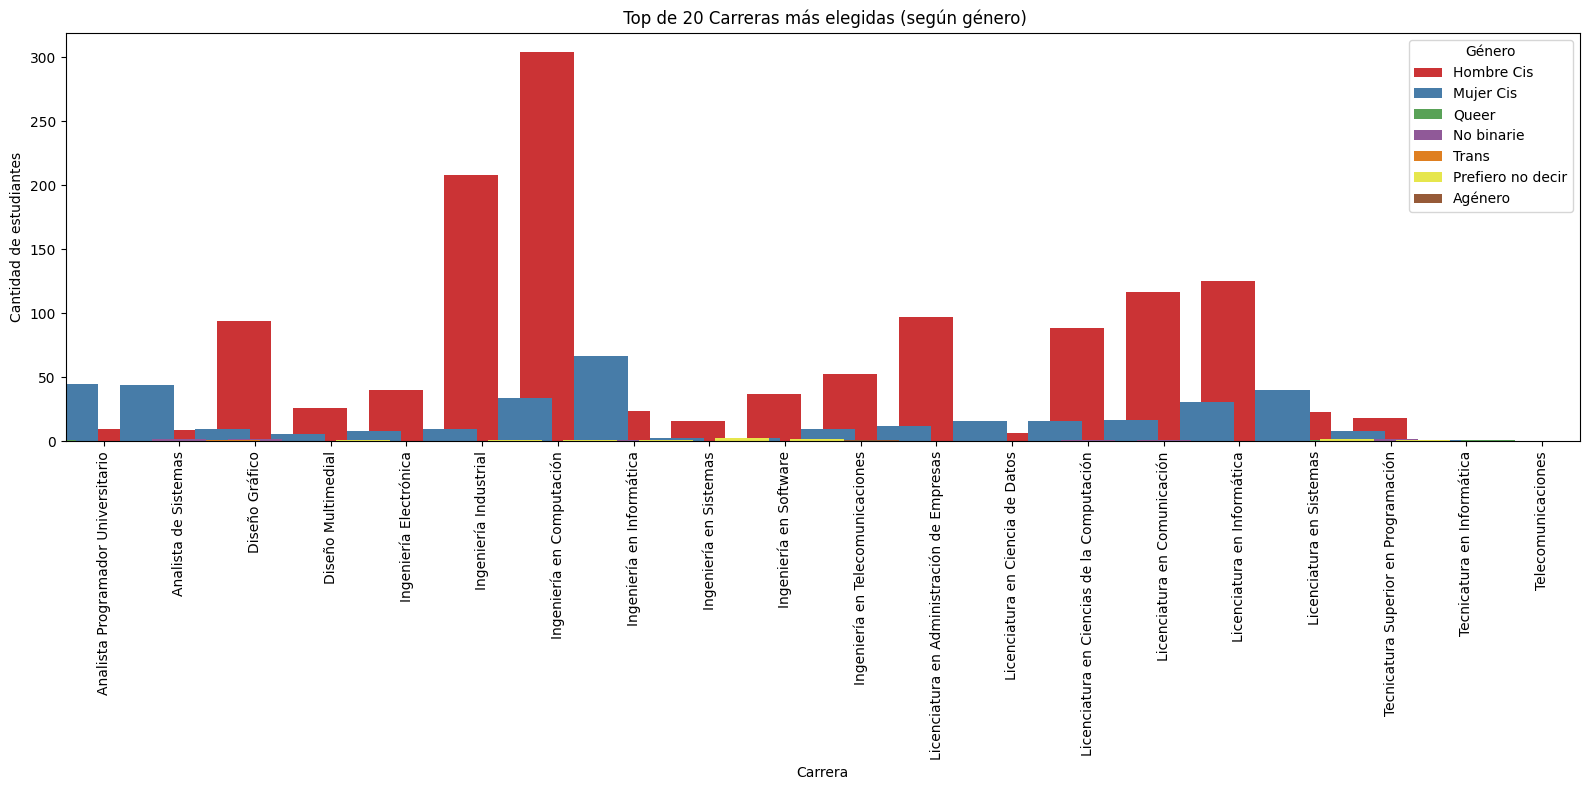

In [9]:
# Conteo de estudiantes por carrera y género
conteo = df.groupby(['carrera', 'genero']).size().reset_index(name='cantidad')
top_20_carreras = (df['carrera'].value_counts().head(20).index)
conteo_top_20 = conteo[conteo['carrera'].isin(top_20_carreras)]

# Gráfico de barras agrupadas
plt.figure(figsize=(16, 8))
sns.barplot(data=conteo_top_20, x='carrera', y='cantidad', hue='genero', palette='Set1', width=5)

plt.title(' Top de 20 Carreras más elegidas (según género)')
plt.xlabel('Carrera')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=90)
plt.legend(title='Género')
plt.tight_layout()
plt.show()

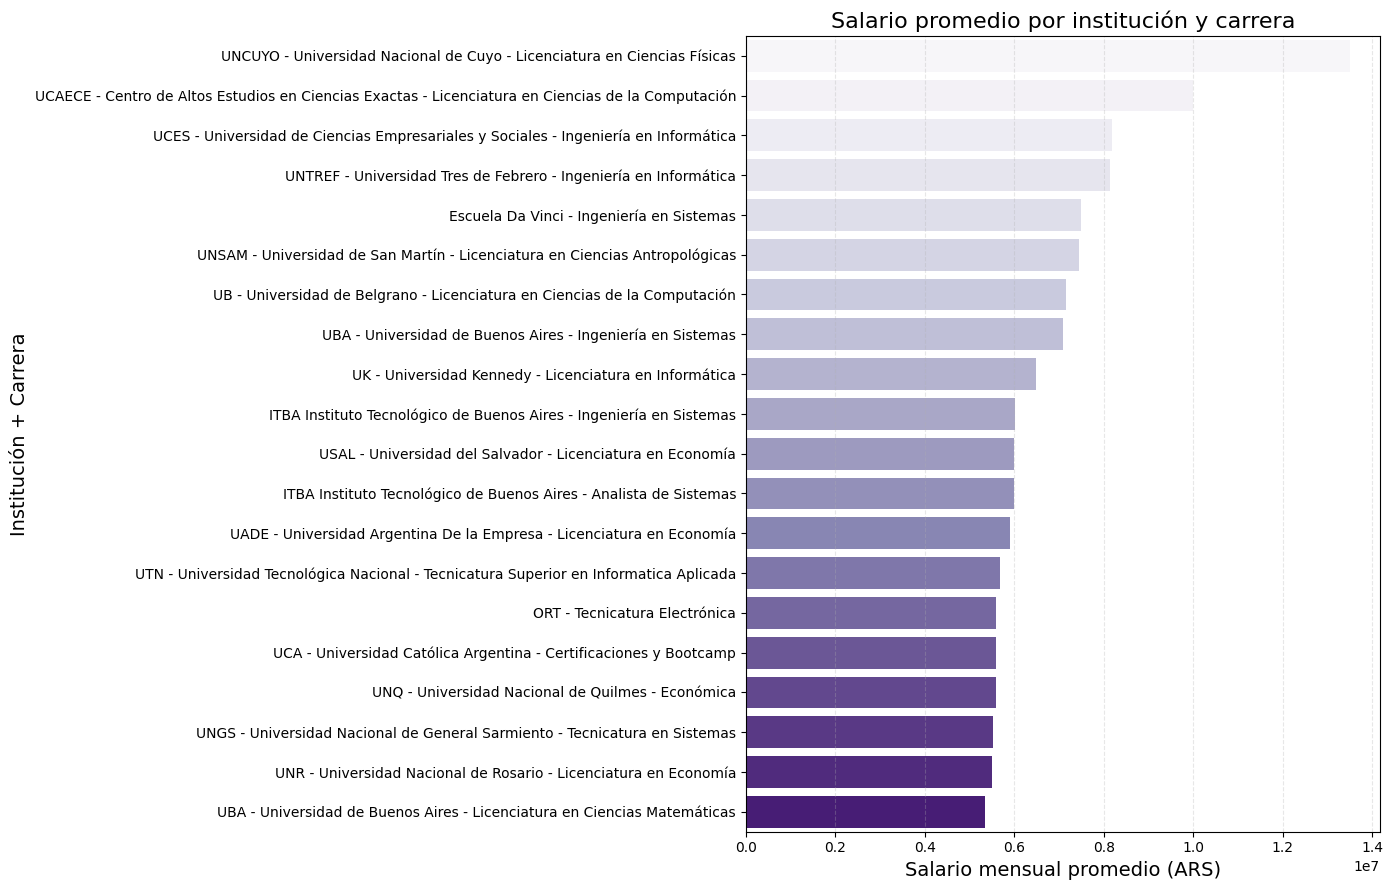

In [12]:
# Asegurar que el salario sea numérico
df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'] = pd.to_numeric(
    df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'],
    errors='coerce'
)

# Eliminar filas con valores nulos relevantes y hacer copia para evitar warnings
df_clean = df.dropna(subset=[
    'institucion_educativa',
    'carrera',
    'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'
]).copy()

# Crear columna combinada: institución + carrera
df_clean['institucion_carrera'] = df_clean['institucion_educativa'] + ' - ' + df_clean['carrera']

# Agrupar para calcular media y mediana del salario
estadisticas = (
    df_clean.groupby('institucion_carrera')['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos']
    .agg(['mean', 'median'])
    .sort_values(by='mean', ascending=False)
    .head(20)
)

# Gráfico de barras
plt.figure(figsize=(14, 9))
sns.barplot(
    x=estadisticas['mean'].values,
    y=estadisticas.index,
    palette='Purples'
)

# Personalización del gráfico
plt.title('Salario promedio por institución y carrera', fontsize=16)
plt.xlabel('Salario mensual promedio (ARS)', fontsize=14)
plt.ylabel('Institución + Carrera', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [14]:
from IPython.display import display, Markdown

# Mostrar tabla después del gráfico
display(Markdown("### 📊 Top 20 Salarios promedio y mediana según institución y carrera"))
display(estadisticas.style.format({"mean": "${:,.0f}", "median": "${:,.0f}"}))


### 📊 Top 20 Salarios promedio y mediana según institución y carrera

,mean,median
institucion_carrera,,
UNCUYO - Universidad Nacional de Cuyo - Licenciatura en Ciencias Físicas,"$13,500,000","$13,500,000"
UCAECE - Centro de Altos Estudios en Ciencias Exactas - Licenciatura en Ciencias de la Computación,"$10,000,000","$10,000,000"
UCES - Universidad de Ciencias Empresariales y Sociales - Ingeniería en Informática,"$8,174,000","$8,174,000"
UNTREF - Universidad Tres de Febrero - Ingeniería en Informática,"$8,137,290","$8,137,290"
Escuela Da Vinci - Ingeniería en Sistemas,"$7,500,000","$7,500,000"
UNSAM - Universidad de San Martín - Licenciatura en Ciencias Antropológicas,"$7,440,000","$7,440,000"
UB - Universidad de Belgrano - Licenciatura en Ciencias de la Computación,"$7,150,000","$7,150,000"
UBA - Universidad de Buenos Aires - Ingeniería en Sistemas,"$7,100,000","$7,100,000"
UK - Universidad Kennedy - Licenciatura en Informática,"$6,480,000","$6,480,000"


### **Interpretación del análisis.**

- Los salarios promedio más altos se concentran en combinaciones específicas de institución y carrera.
- La comparación entre media y mediana muestra si hay presencia de sueldos extremos que puedan afectar el promedio.
- Esta información es útil para quienes buscan orientarse hacia carreras e instituciones con mayor retorno salarial.


## **Conclusión:**

Este estudio estadístico sobre el mercado laboral del sector IT en Argentina, basado en la encuesta de Sysarmy, permitió explorar en profundidad múltiples variables y relaciones relevantes, combinando análisis descriptivo, visualización de datos y principios fundamentales de inferencia estadística.

A partir de una muestra robusta de **n = 5968 casos válidos**, se identificaron aspectos clave:

#### **Distribución salarial**

La distribución del salario mensual bruto en pesos argentinos mostró una **asimetría positiva**, es decir, una cola extendida hacia valores más altos. En el conjunto completo, la **media salarial fue de $2.728.423** y la **mediana de $2.290.000**, lo que indica que los valores extremos elevan el promedio.

Al **filtrar los salarios mayores a $6.000.000**, la media bajó a $2.398.871 y la mediana a $2.190.000, revelando una visión más representativa del salario típico del sector.

#### **Aplicación del Teorema Central del Límite**

Dado el tamaño significativo de la muestra, es posible aplicar el **Teorema Central del Límite**, lo que nos permite suponer que la distribución de la media muestral se aproxima a una distribución normal:

$$
\bar{X}_n \approx N\left(\mu, \frac{\sigma^2}{n}\right)
$$


donde:  
* $\bar{X}_n$ es la media muestral,
* $\mu$ es la media poblacional,
* $\sigma^2$ es la varianza,
* $n$ es el tamaño de la muestra.


Esta propiedad permite inferir con mayor confianza que la media observada refleja el comportamiento general del salario en el sector, siempre y cuando se consideren los ajustes necesarios para tratar los outliers.

#### **Variables influyentes**

- **Edad y experiencia**: La mayoría de las personas encuestadas tiene entre 25 y 45 años y menos de 5 años de experiencia en el sector, reflejando una industria joven. Aunque la experiencia mejora los ingresos, la relación no es lineal, y hay mucha variabilidad incluso en los tramos altos.

- **Género**: Se detectaron **brechas salariales significativas** entre hombres cis y otros géneros. Las mujeres cis y personas no binarias tienden a percibir ingresos inferiores en promedio.

- **Nivel educativo**: Existe una clara correlación entre mayor nivel educativo y mejores salarios. Los niveles de posgrado (especialización, maestría, doctorado) se asocian a ingresos más altos que los niveles universitarios o secundarios.

- **Seniority**: A mayor seniority, mayor es la mediana salarial y la dispersión. Los roles Senior acceden a los mejores ingresos, pero también muestran mayor variabilidad.

- **Lenguaje de programación**: Aunque las diferencias no son extremas, Bash/Shell, Python, Java y TypeScript muestran promedios salariales superiores al resto.

- **Región**: Se observó una diferencia notable entre CABA y el interior del país, con **medianas salariales más altas en CABA**, lo cual puede responder a concentración de empresas, proyectos internacionales o trabajo remoto para el exterior.

#### **Salario real e inflación**

Una de las simulaciones más relevantes fue la comparación del salario real entre 2024 y un escenario proyectado para 2025. Aunque se aplicó un aumento nominal del **120%**, al ajustarlo por una inflación acumulada del **211,4%**, el **poder adquisitivo real no mejora**, e incluso se mantiene igual o disminuye levemente. Este hallazgo demuestra cómo los aumentos nominales pueden ser engañosos si no se contemplan en términos reales.

#### **Conformidad con los ingresos**

La mayoría de los encuestados se encuentra en un nivel intermedio de conformidad con su salario. Esto revela una percepción moderada de satisfacción económica, que no siempre se alinea directamente con el monto percibido, ya que entran en juego otros factores como expectativas, estabilidad y contexto personal.

### **Reflexión final**

Este análisis integral del mercado laboral IT no solo permitió aplicar herramientas estadísticas y visuales, sino también **conectar teoría y práctica** a través de la aplicación de conceptos como la distribución muestral, la media ajustada, y el análisis de varianza en poblaciones reales.

En definitiva, los resultados obtenidos permiten:
- Comprender mejor cómo se distribuyen los ingresos en el sector,
- Detectar **desigualdades estructurales**,
- Y brindar herramientas para tomar decisiones informadas, tanto a nivel individual (orientación laboral, formación, negociación) como organizacional o de política pública.

El trabajo estadístico riguroso, apoyado en el uso de Python y librerías como `pandas`, `matplotlib` y `seaborn`, demuestra que los datos bien analizados pueden ser una fuente poderosa de conocimiento y transformación social.


### **Agradecimientos**

Agradecezco especialmente a la *profesora Daniela* por su dedicación, por acompañarnos en cada clase.  
**Gracias por enseñarnos con paciencia, claridad y compromiso.**

Disfruté mucho realizar este trabajo. Me dejó con ganas de seguir explorando, hacer más comparaciones, cruzar más variables y plantear nuevas conjeturas. Siento que todavía hay mucho por descubrir y analizar desde la estadística aplicada.
Como proyecto personal, me gustaría realizar comparaciones cuando esté disponible el próximo trimestre en la base de Sysarmy, especialmente analizando **cómo varía el ingreso bruto en pesos y en dólares**, comparado con la **inflación** y el **poder adquisitivo**.



